In [1]:
# prepared by Sam. feel free to consult (sirmaxford@gmail.com).
import matplotlib.pyplot as plt; import pandas as pd; import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.interpolate import UnivariateSpline
%matplotlib inline
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

In [2]:
columns = ['r', 'b', 'atp', 'md', 'v_av', 'v_sd']
df = pd.read_csv('grinding_vel.csv', names=columns) # vel_changes.csv

In [3]:
df

r   b   atp    md       v_av       v_sd
0   0.10  13  2000  3000   0.926474   0.626523
1   0.15  13  2000  3000   3.406925   2.796185
2   0.20  13  2000  3000   3.216800   3.076401
3   0.25  13  2000  3000   1.088440   0.840480
4   0.30  13  2000  3000   9.501907  11.116915
5   0.35  13  2000  3000  13.448640  11.546783
6   0.40  13  2000  3000  12.409647  11.093748
7   0.45  13  2000  3000  10.015139   8.229602
8   0.50  13  2000  3000  10.539538   8.713125
9   0.55  13  2000  3000  13.527846   8.541106
10  0.60  13  2000  3000  13.165140   8.141510
11  0.65  13  2000  3000  12.043182   7.306770
12  0.70  13  2000  3000  12.331914   7.505000
13  0.75  13  2000  3000  11.723131   7.116465
14  0.80  13  2000  3000  11.691966   7.248936
15  0.85  13  2000  3000  10.876282   5.304208
16  0.90  13  2000  3000  11.316034   6.288091
17  0.95  13  2000  3000  10.762110   6.165490
18  1.00  13  2000  3000  10.834875   5.646035

In [4]:
#df[0:10]

In [5]:
r_change = df #[0:10]

In [6]:
r_change['v_av']

0      0.926474
1      3.406925
2      3.216800
3      1.088440
4      9.501907
5     13.448640
6     12.409647
7     10.015139
8     10.539538
9     13.527846
10    13.165140
11    12.043182
12    12.331914
13    11.723131
14    11.691966
15    10.876282
16    11.316034
17    10.762110
18    10.834875
Name: v_av, dtype: float64

In [7]:
x = r_change['r']
y = r_change['v_av']
xx = np.linspace(x.min(), x.max(), 1000)

# interpolate + smooth
itp = interp1d(x,y, kind='linear')
window_size, poly_order = 101, 3
yy_sg = savgol_filter(itp(xx), window_size, poly_order)

# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit, _ = curve_fit(func, x, y) #, bounds=(0.0,[1.0,0.3,0.6]))
yy_fit = func(xx, *fit)

#s = UnivariateSpline(x, y, s=2)
#xs = np.linspace(x.min(), x.max(), 100)
#ys = s(xs)

/home/sam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [8]:
vsd25 = r_change['v_sd']

$f(x) = A + B \tanh\left(\frac{x-x_0}{\sigma}\right)$

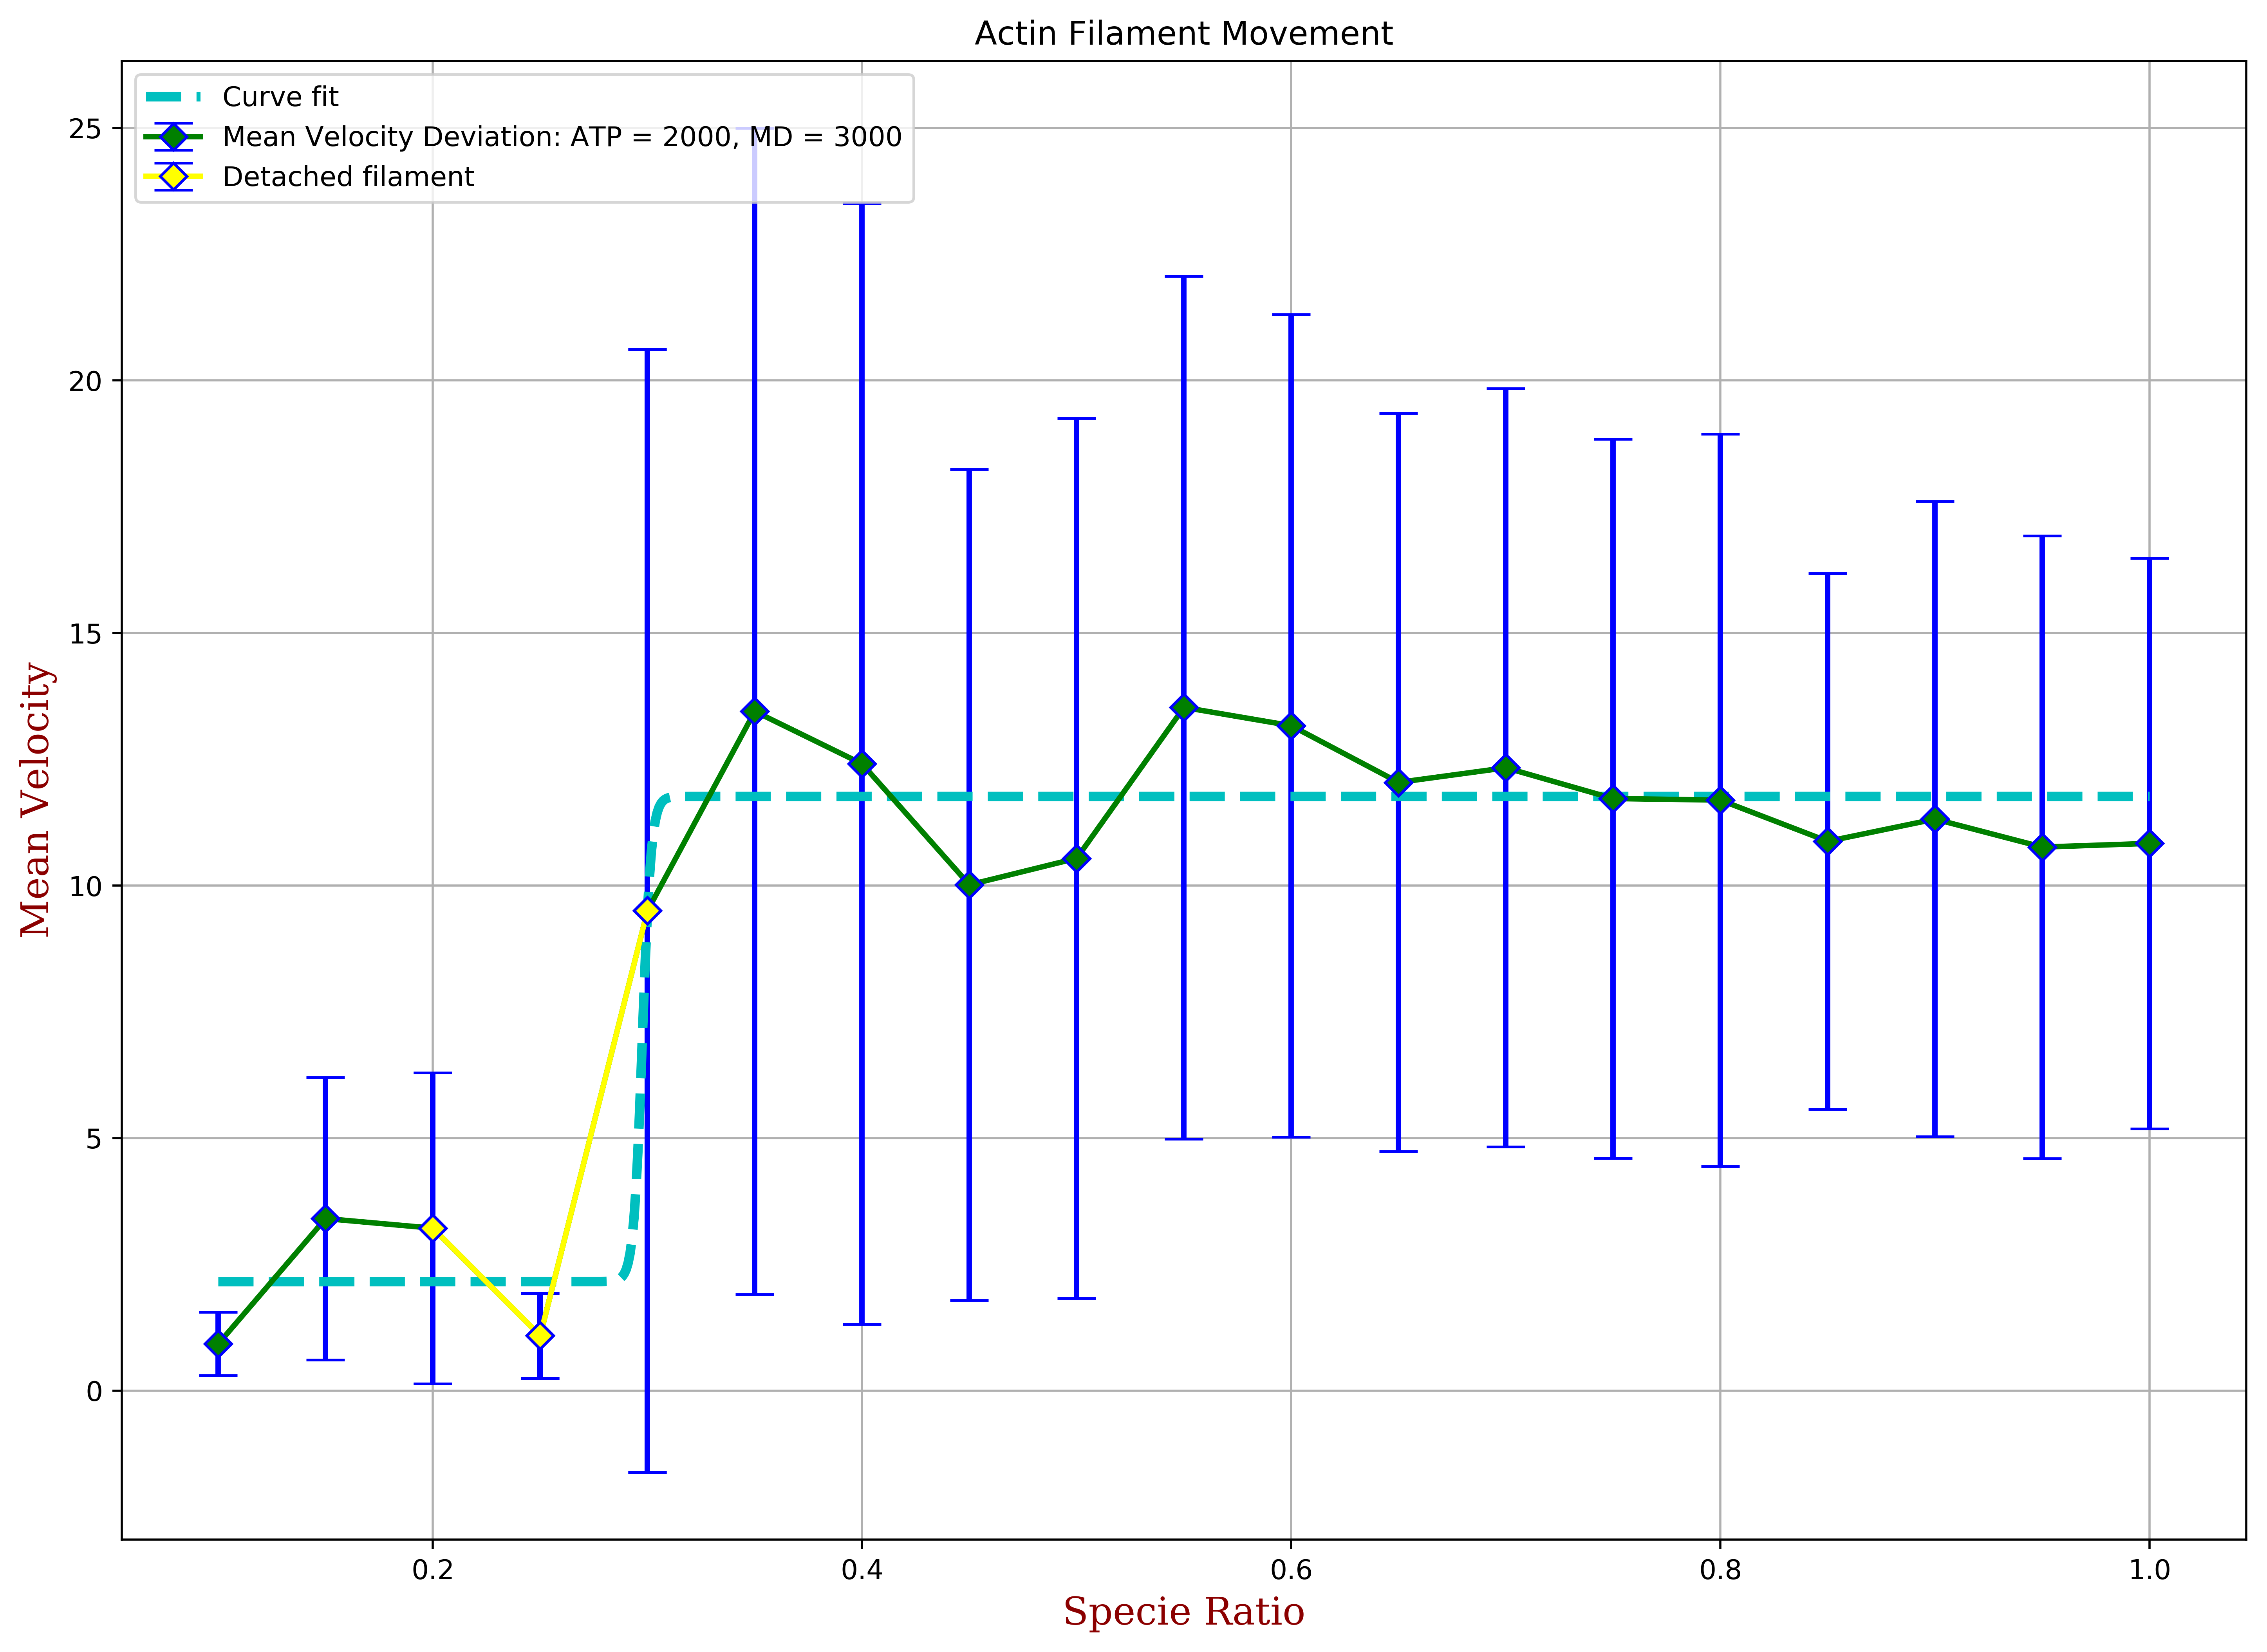

In [9]:
#plt.figure(figsize=(10,8))
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_sg, 'k', label= "Smoothed curve")
#plt.plot(xs, ys)
plt.plot(xx, yy_fit, 'c--', linewidth=3.5, label= "Curve fit")
plt.errorbar(x,y,yerr=r_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: ATP = 2000, MD = 3000')
plt.errorbar(x[2:5],y[2:5],yerr=vsd25[2:5], ecolor='b', capsize=7, \
             mec='blue', color='yellow', marker='D', linewidth=2, \
             markersize=7, label='Detached filament')
plt.xlabel('Specie Ratio', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()

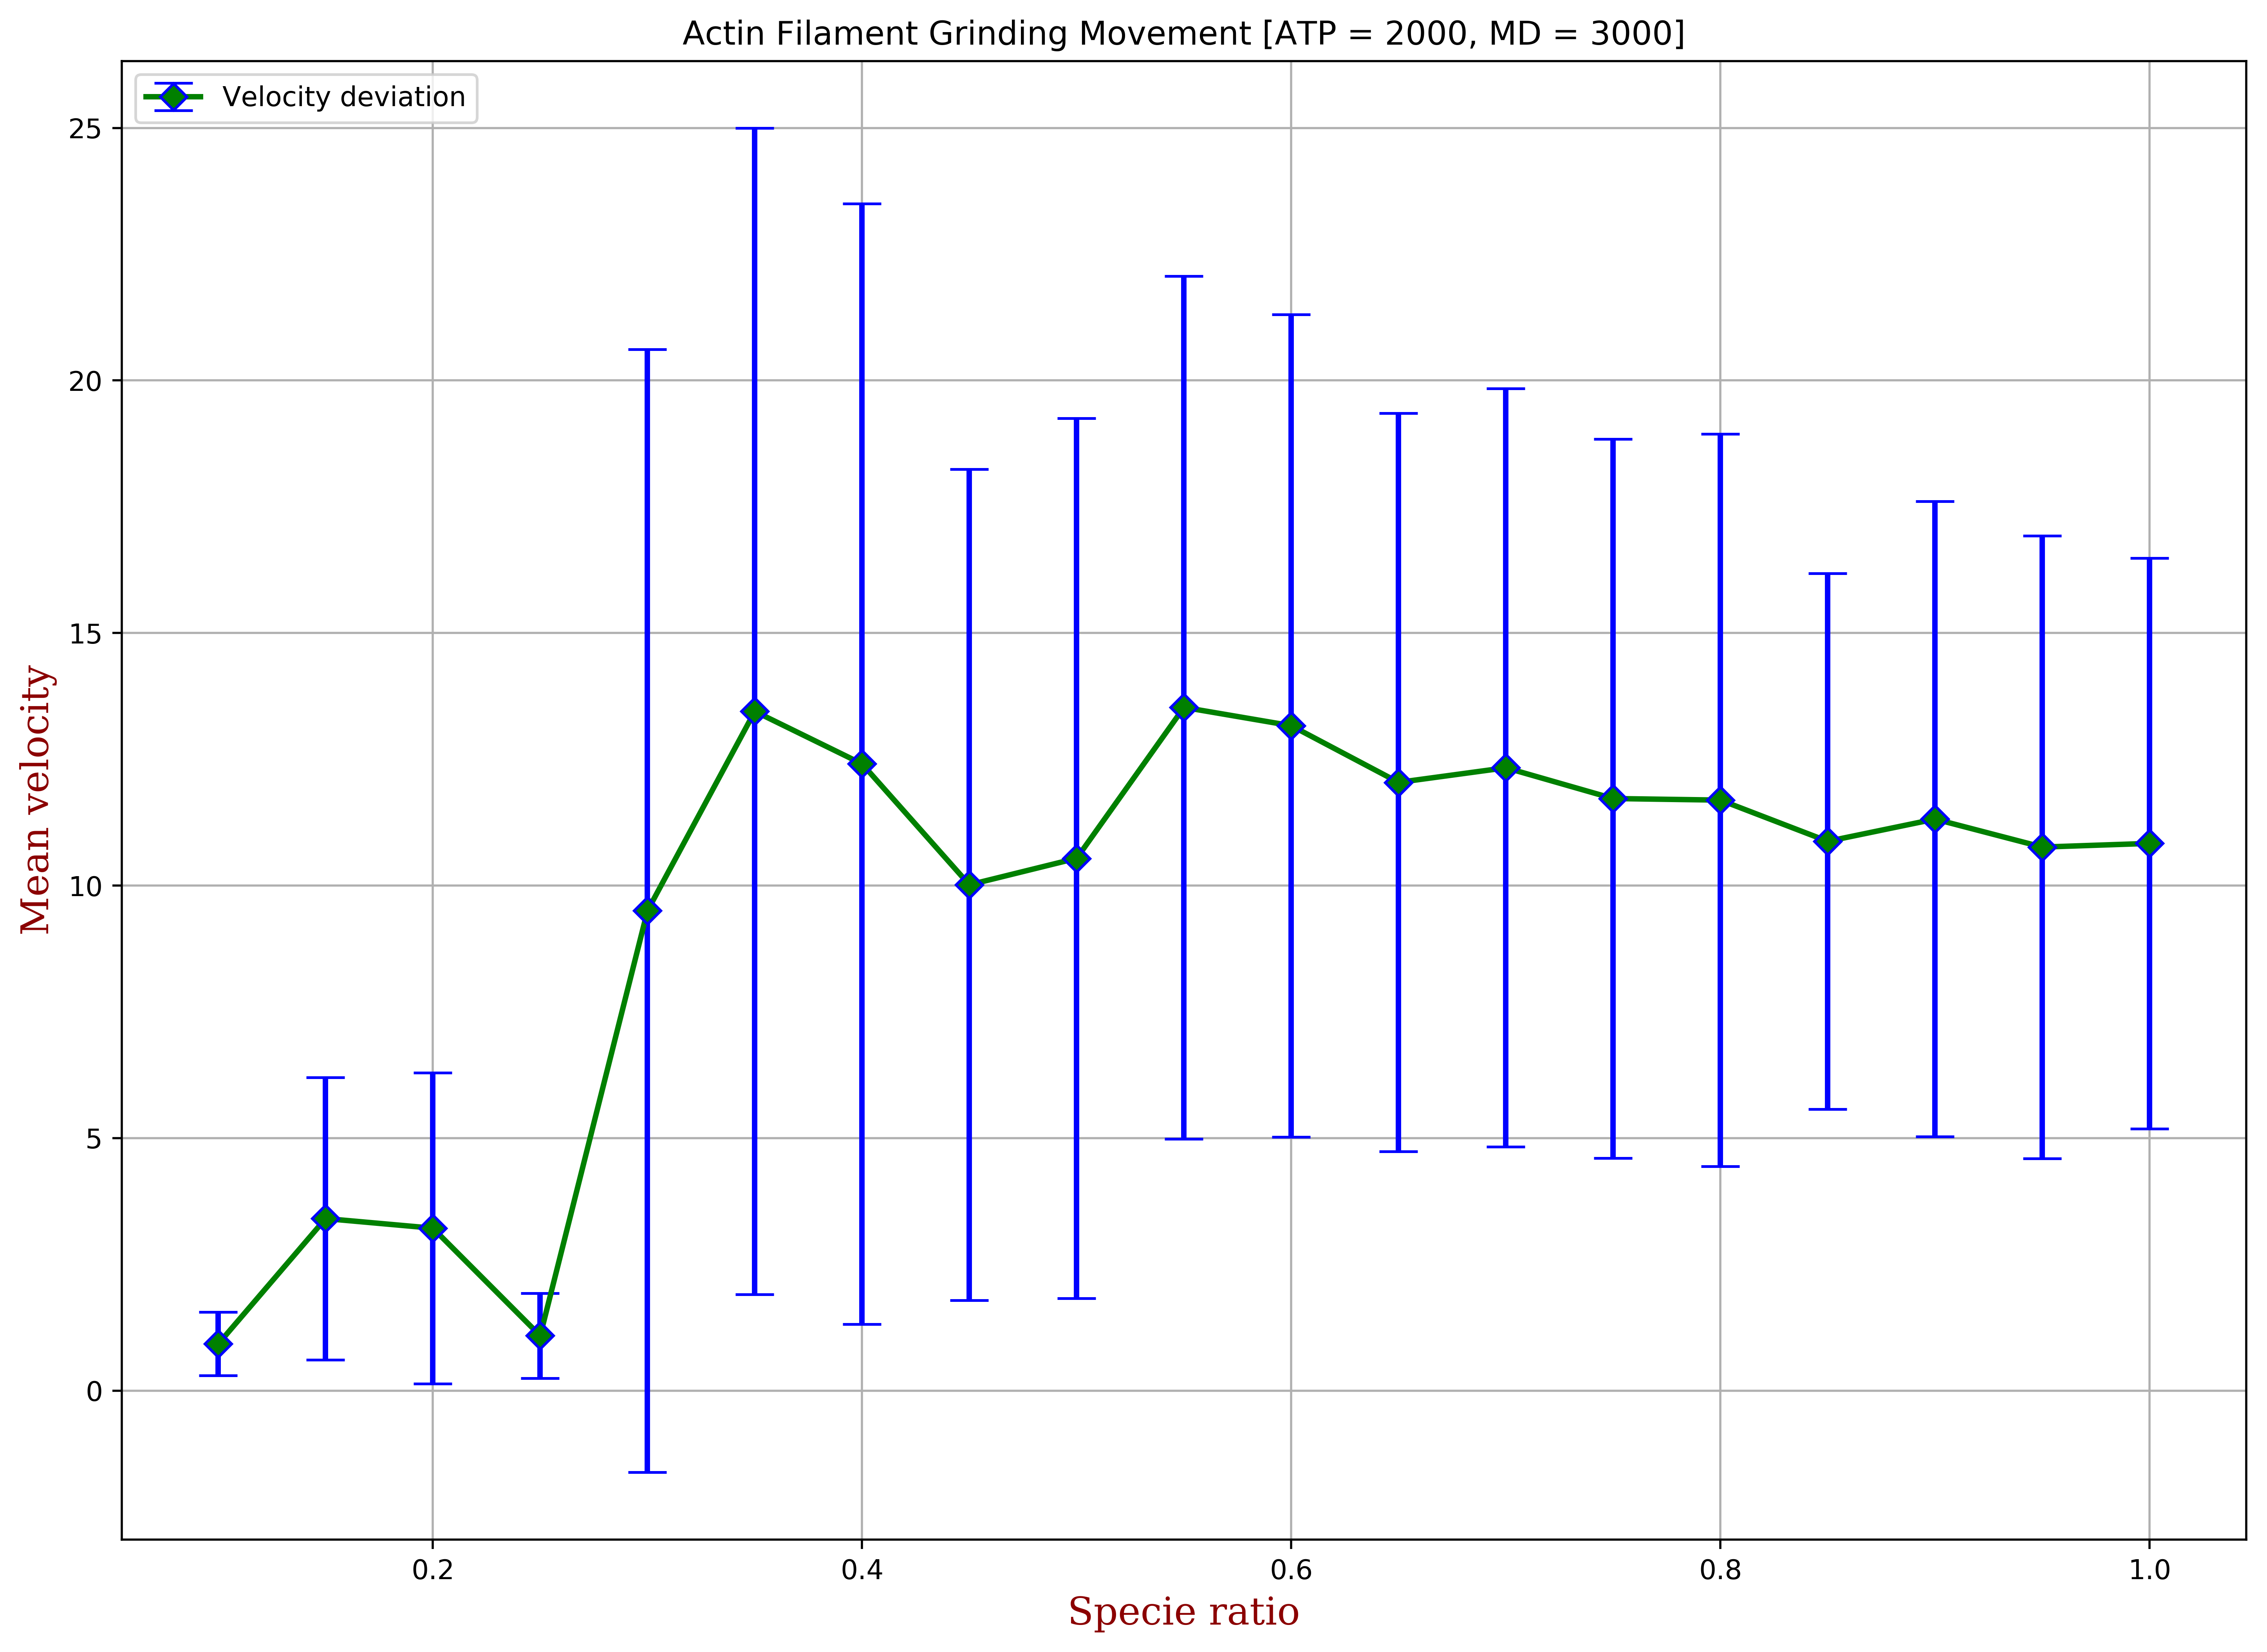

In [10]:
#plt.figure(figsize=(10,8))
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_sg, 'k', label= "Smoothed curve")
#plt.plot(xs, ys)
#plt.plot(xx, yy_fit, 'c--', linewidth=3.5, label= "Curve fit")
plt.errorbar(x,y,yerr=r_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linewidth=2, \
             markersize=7, label='Velocity deviation')
plt.xlabel('Specie ratio', fontdict=font); plt.ylabel('Mean velocity', fontdict=font)
plt.title('Actin Filament Grinding Movement [ATP = 2000, MD = 3000]'); plt.legend(loc='upper left'); plt.grid()
plt.savefig('actin_grinding_1.svg', format='svg', dpi=1200)

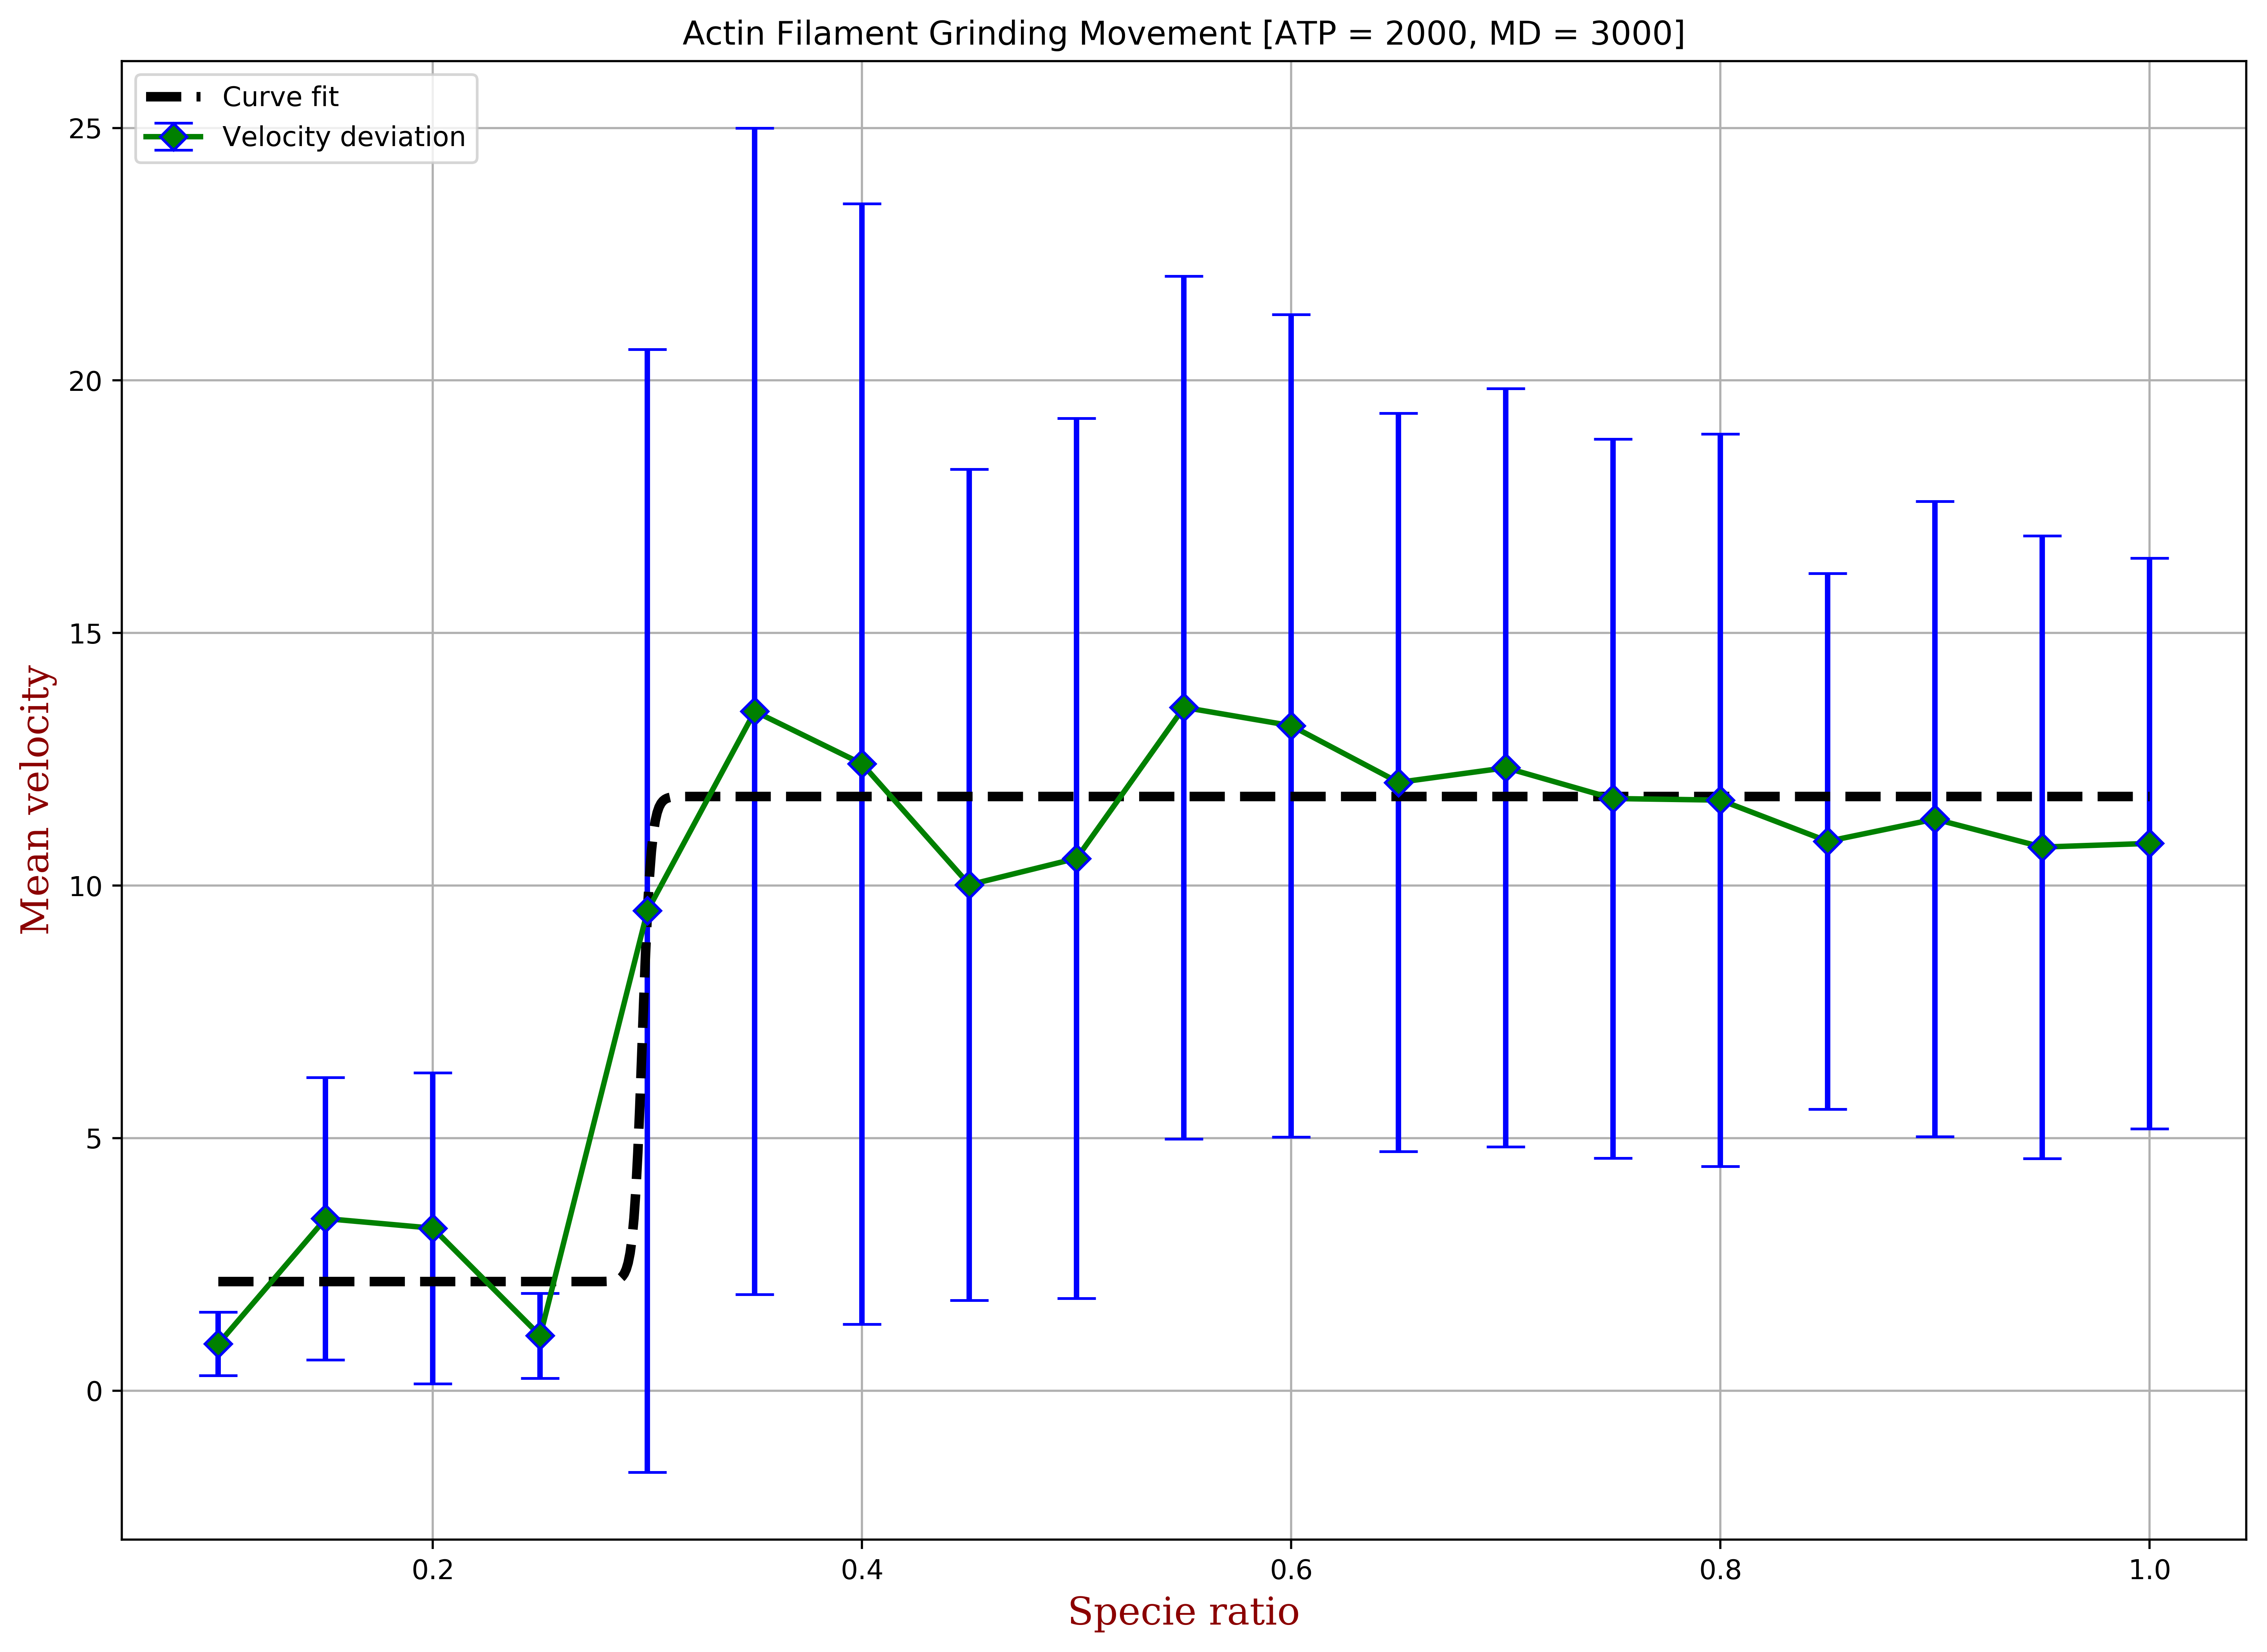

In [13]:
#plt.figure(figsize=(10,8))
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_sg, 'k', label= "Smoothed curve")
#plt.plot(xs, ys)
plt.errorbar(x,y,yerr=r_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linewidth=2, \
             markersize=7, label='Velocity deviation')
plt.plot(xx, yy_fit, 'k--', linewidth=3.5, label= "Curve fit")
plt.xlabel('Specie ratio', fontdict=font); plt.ylabel('Mean velocity', fontdict=font)
plt.title('Actin Filament Grinding Movement [ATP = 2000, MD = 3000]'); plt.legend(loc='upper left'); plt.grid()
plt.savefig('actin_grinding_2.svg', format='svg', dpi=1200)

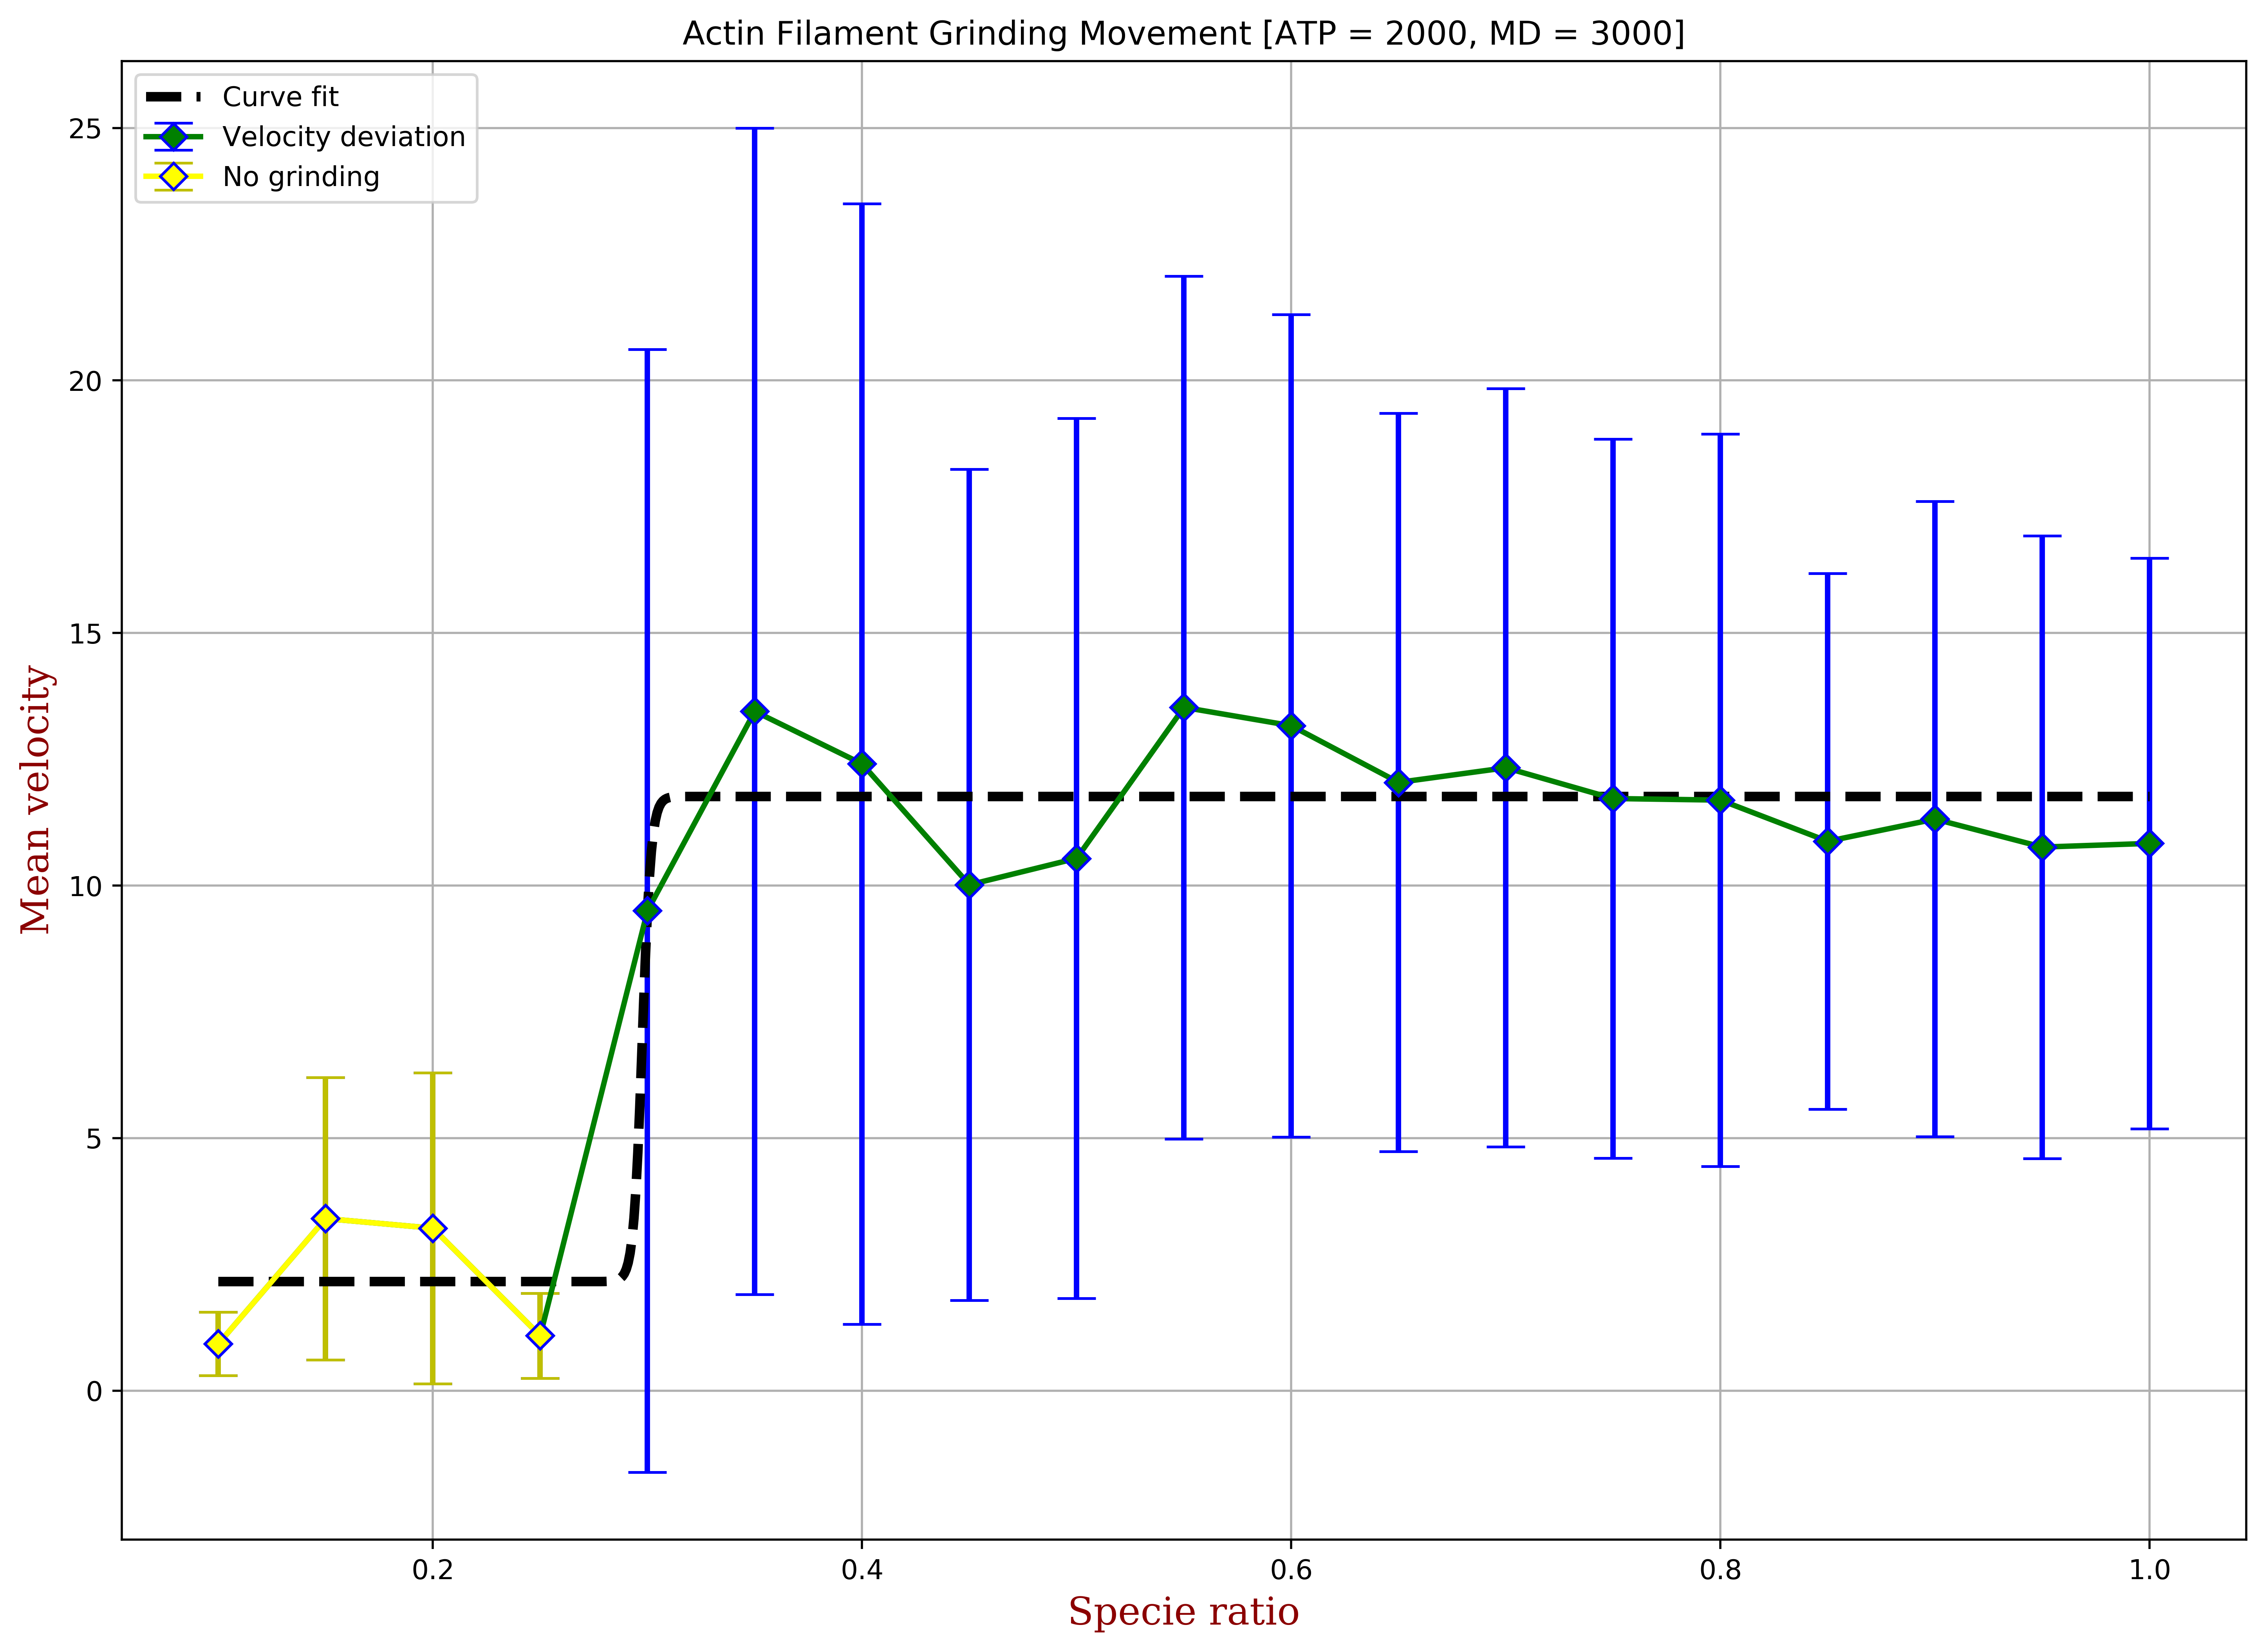

In [17]:
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_sg, 'k', label= "Smoothed curve")
#plt.plot(xs, ys)
plt.errorbar(x,y,yerr=r_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linewidth=2, \
             markersize=7, label='Velocity deviation')
plt.errorbar(x[0:4],y[0:4],yerr=vsd25[0:4], ecolor='y', capsize=7, \
             mec='blue', color='yellow', marker='D', linewidth=2, \
             markersize=7, label='No grinding')
plt.plot(xx, yy_fit, 'k--', linewidth=3.5, label= "Curve fit")
plt.xlabel('Specie ratio', fontdict=font); plt.ylabel('Mean velocity', fontdict=font)
plt.title('Actin Filament Grinding Movement [ATP = 2000, MD = 3000]'); plt.legend(loc='upper left'); plt.grid()
plt.savefig('actin_grinding_3.svg', format='svg', dpi=1200)

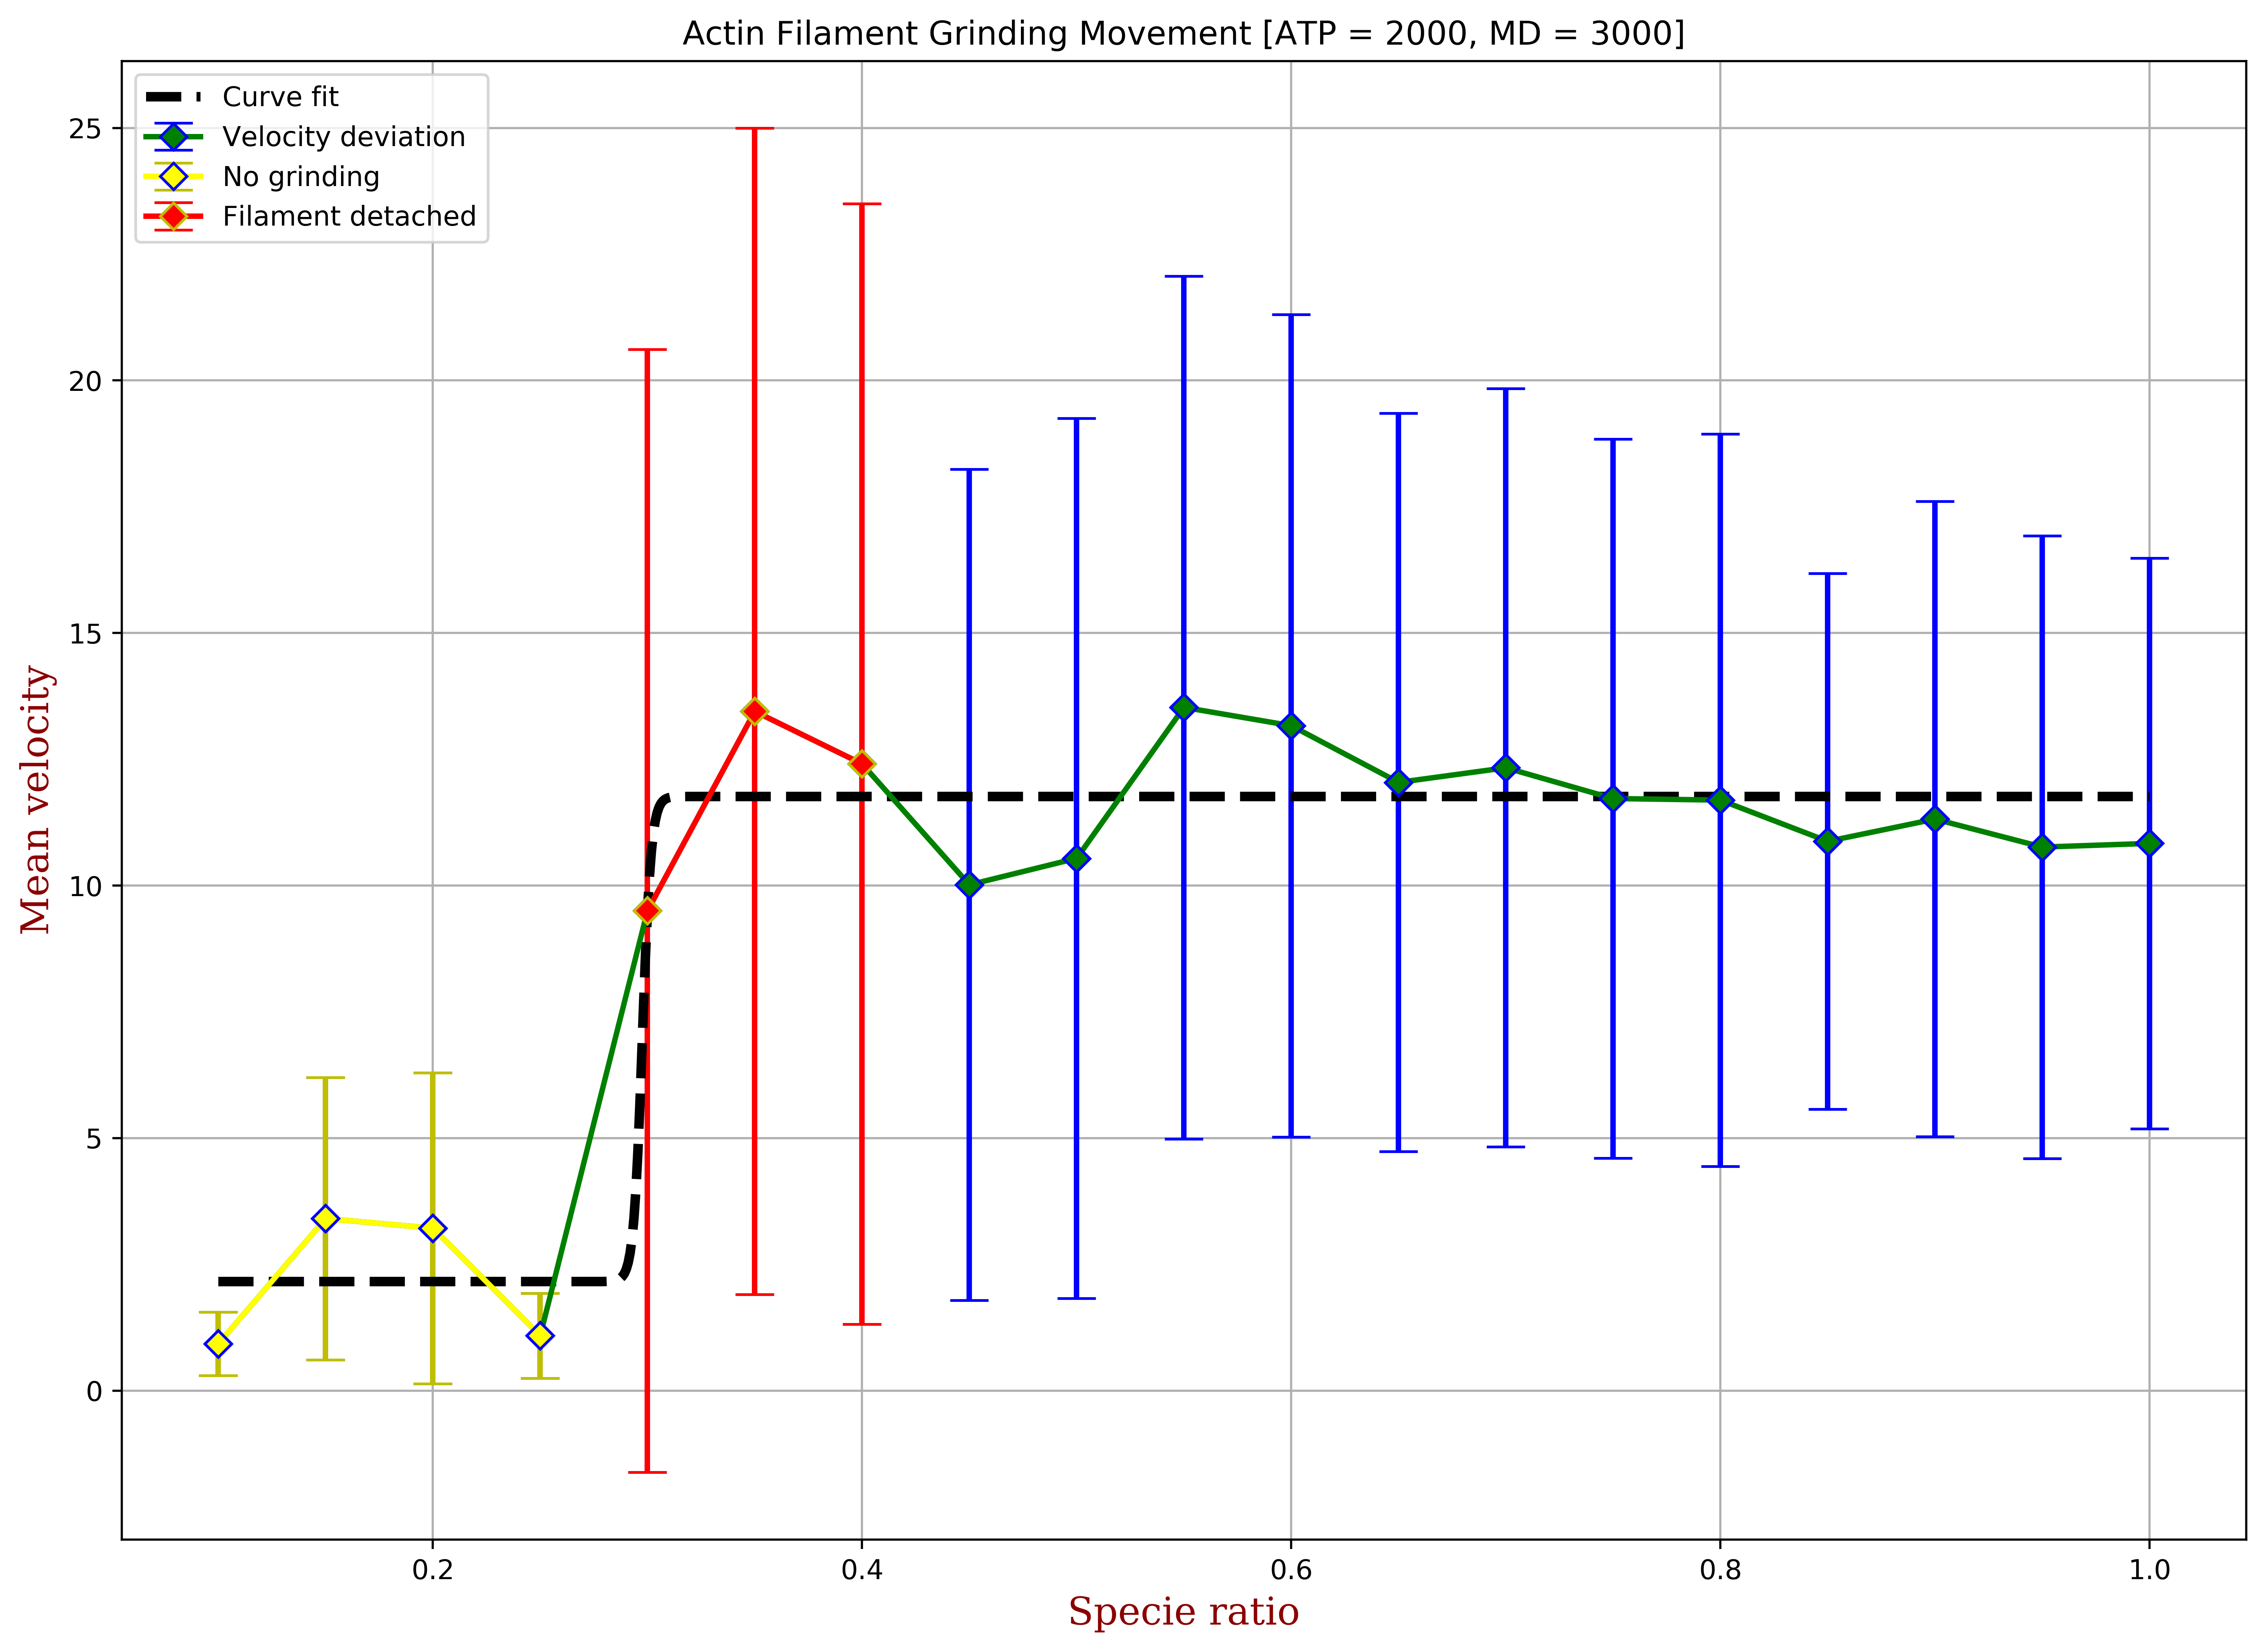

In [28]:
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_sg, 'k', label= "Smoothed curve")
#plt.plot(xs, ys)
plt.errorbar(x,y,yerr=r_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linewidth=2, \
             markersize=7, label='Velocity deviation')
plt.errorbar(x[0:4],y[0:4],yerr=vsd25[0:4], ecolor='y', capsize=7, \
             mec='blue', color='yellow', marker='D', linewidth=2, \
             markersize=7, label='No grinding')
plt.errorbar(x[4:7],y[4:7],yerr=vsd25[4:7], ecolor='r', capsize=7, \
             mec='y', color='r', marker='D', linewidth=2, \
             markersize=7, label='Filament detached')
plt.plot(xx, yy_fit, 'k--', linewidth=3.5, label= "Curve fit")
plt.xlabel('Specie ratio', fontdict=font); plt.ylabel('Mean velocity', fontdict=font)
plt.title('Actin Filament Grinding Movement [ATP = 2000, MD = 3000]'); plt.legend(loc='upper left'); plt.grid()
plt.savefig('actin_grinding_4_tight.svg',bbox_inches='tight', format='svg', dpi=1200)

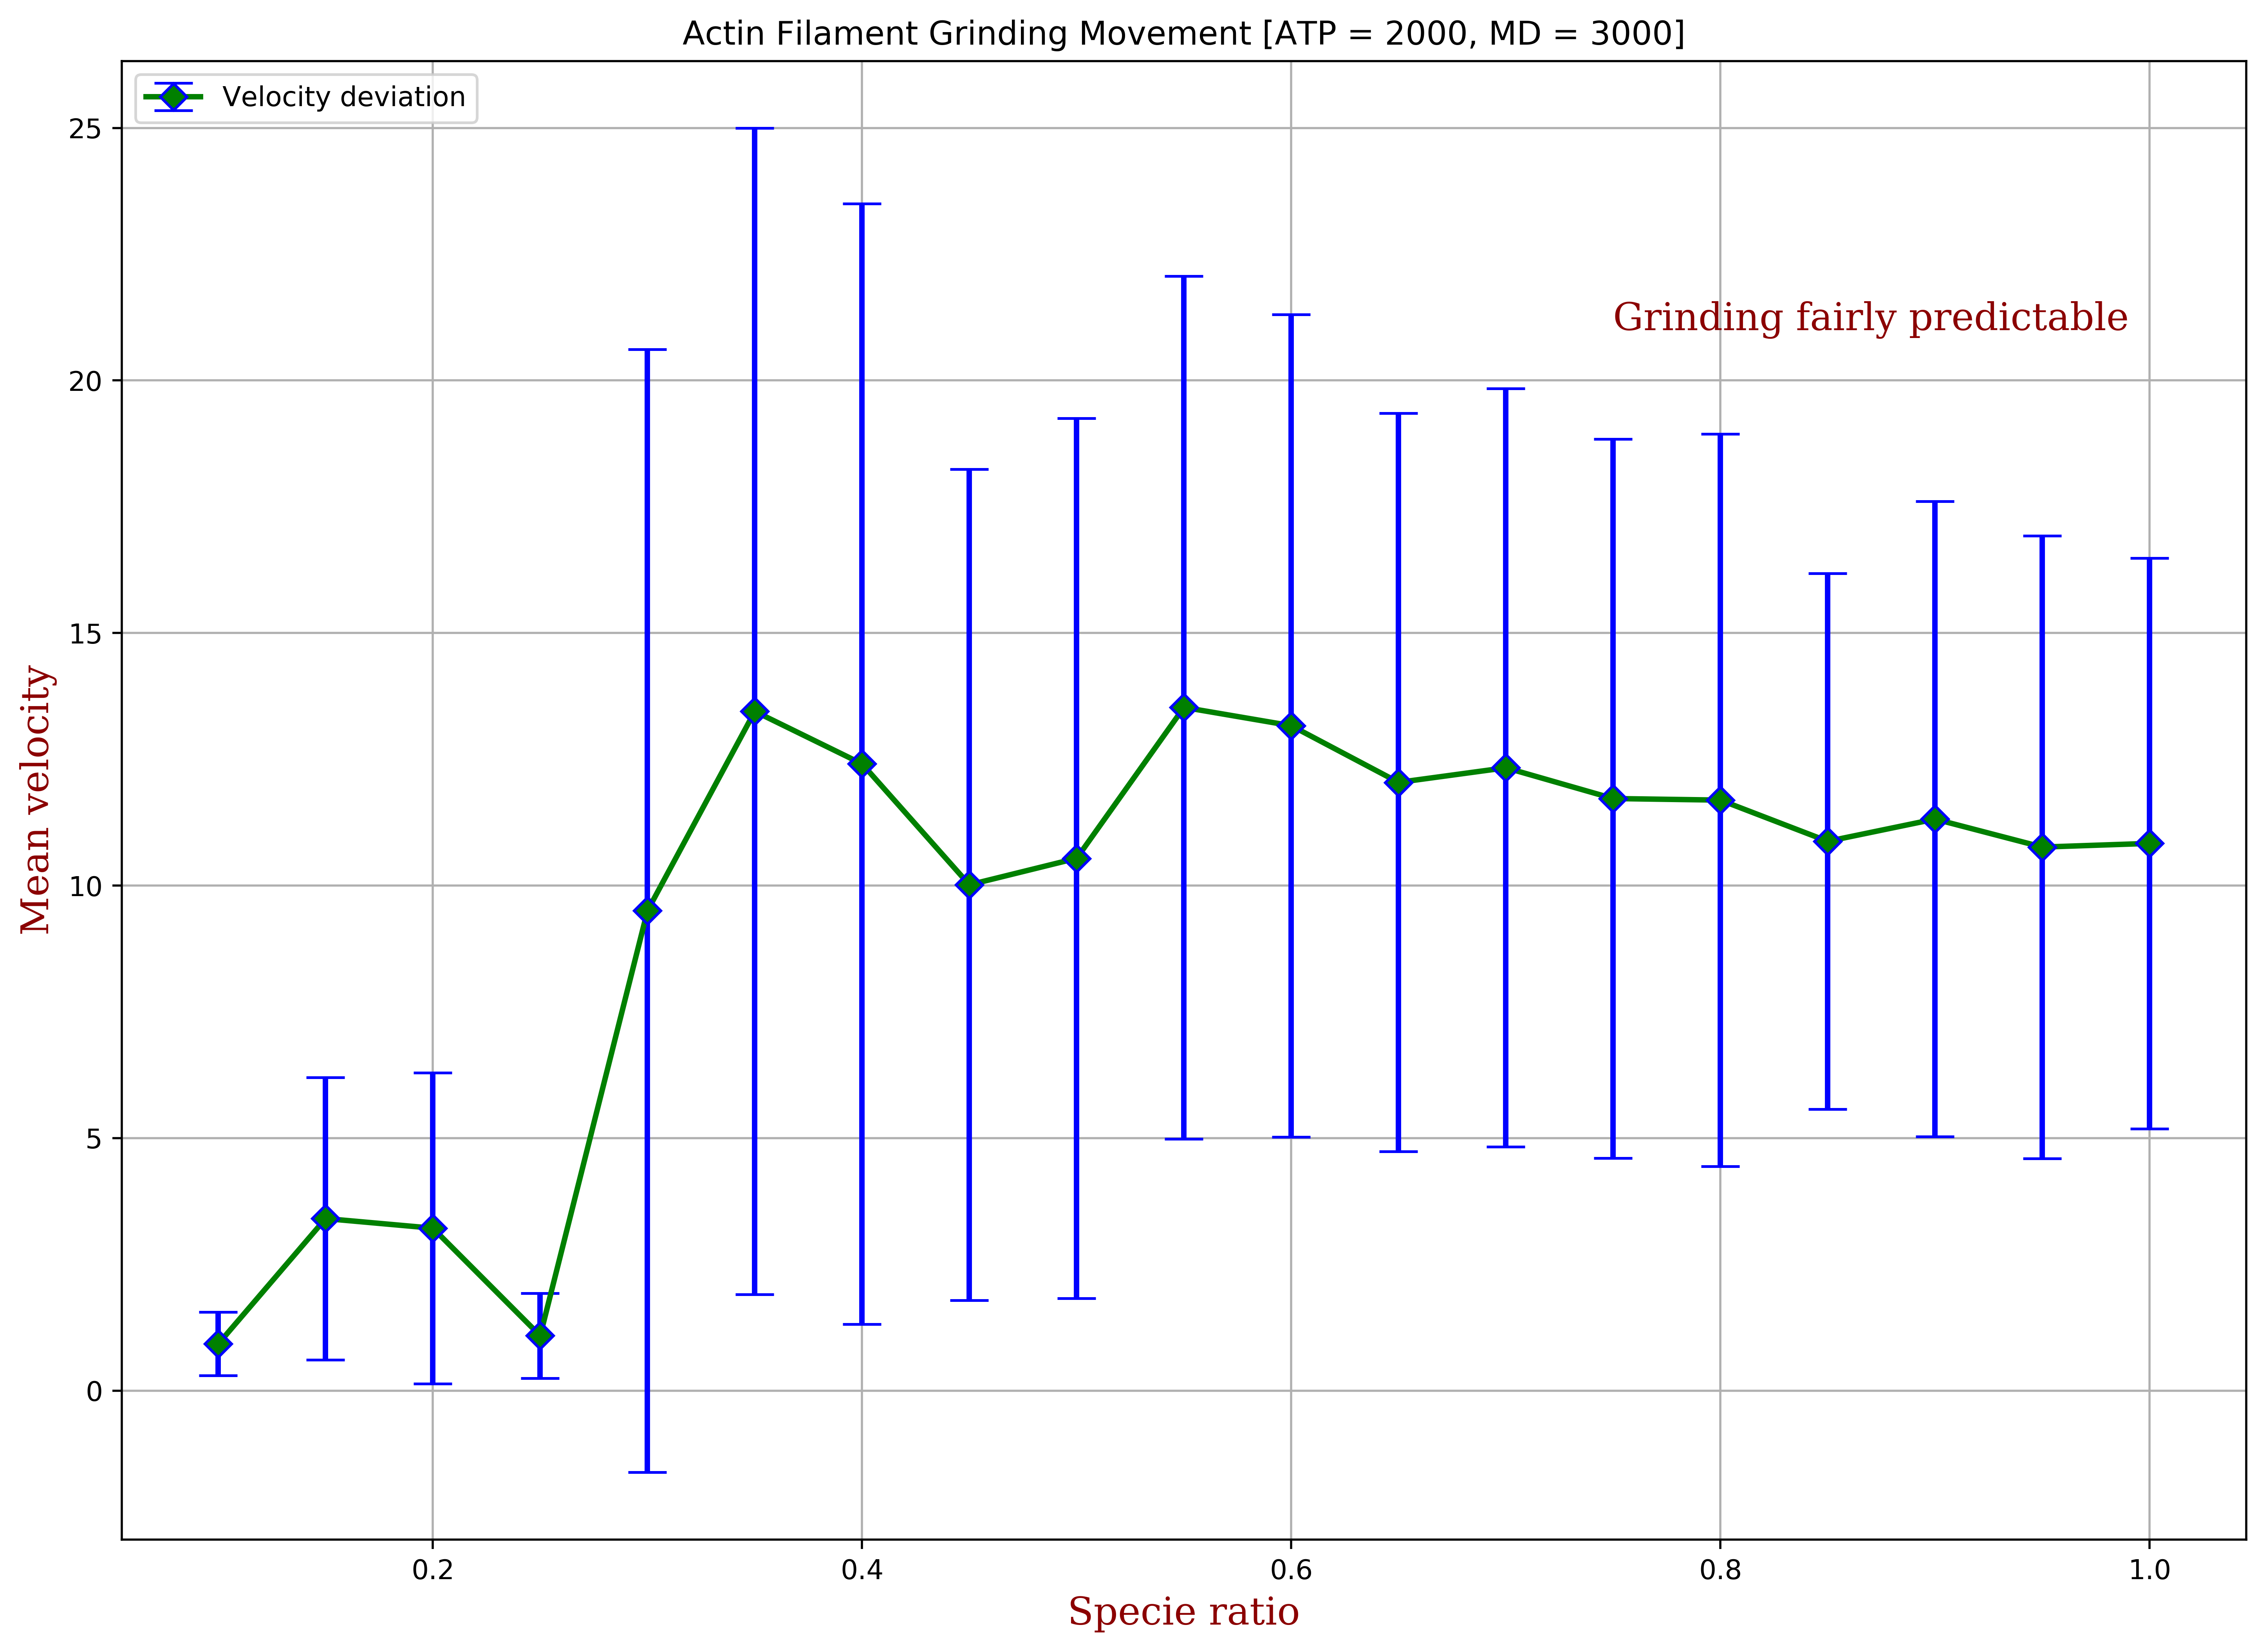

In [26]:
#plt.figure(figsize=(10,8))
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_sg, 'k', label= "Smoothed curve")
#plt.plot(xs, ys)
#plt.plot(xx, yy_fit, 'c--', linewidth=3.5, label= "Curve fit")
plt.errorbar(x,y,yerr=r_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linewidth=2, \
             markersize=7, label='Velocity deviation')
#plt.errorbar(x[2:7],y[2:7],yerr=vsd25[2:7], ecolor='y', capsize=7, \
#             mec='blue', color='yellow', marker='D', linewidth=2, \
#             markersize=7, label='Detached filament')
plt.xlabel('Specie ratio', fontdict=font); plt.ylabel('Mean velocity', fontdict=font)
#plt.text(0.12,9,'No grinding',fontdict=font)
#plt.text(0.3,21,'Grinding is erratic',fontdict=font)
plt.text(0.75,21,'Grinding fairly predictable',fontdict=font)
#plt.text(0.75,2,'Velocity deviation',fontdict=font)
#plt.annotate(r"$\langle$",fontsize=100, xy=(0.27, 0.77), rotation=90) #, xycoords='figure fraction')

plt.title('Actin Filament Grinding Movement [ATP = 2000, MD = 3000]'); plt.legend(loc='upper left'); plt.grid()
plt.savefig('actin_grinding_11.svg', format='svg', dpi=1200)

In [8]:
df[10:25]

r   b   atp    md     v_av     v_sd
10  0.9  13   300  3000  3.16475  0.42185
11  0.9  13   600  3000  4.48637  0.46199
12  0.9  13   900  3000  5.22617  0.92963
13  0.9  13  1200  3000  5.47609  0.44497
14  0.9  13  1500  3000  6.15356  0.56837
15  0.9  13  1800  3000  6.38277  1.16754
16  0.9  13  2100  3000  6.64491  0.93268
17  0.9  13  2400  3000  6.67938  0.61918
18  0.9  13  2700  3000  6.65730  0.78833
19  0.9  13  3000  3000  7.02342  0.40345
20  0.9  13  3300  3000  7.15628  1.10814
21  0.9  13  3600  3000  7.31357  1.08375
22  0.9  13  3900  3000  7.16177  0.61391
23  0.9  13  4200  3000  7.29127  0.83575
24  0.9  13  4500  3000  7.34592  0.92825

In [9]:
atp_change = df[10:25]

In [10]:
x = atp_change['atp']
y = atp_change['v_av']
xx = np.linspace(x.min(), x.max(), 1000)

# interpolate + smooth
itp = interp1d(x,y, kind='linear')
window_size, poly_order = 101, 3
yy_sg = savgol_filter(itp(xx), window_size, poly_order)

# or fit to a global function
#def func(x, A, B, x0, sigma):
#    return A+B*np.tanh((x-x0)/sigma)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

fit, _ = curve_fit(func, x, y)
yy_fit = func(xx, *fit)

/home/nitta/.local/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/nitta/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


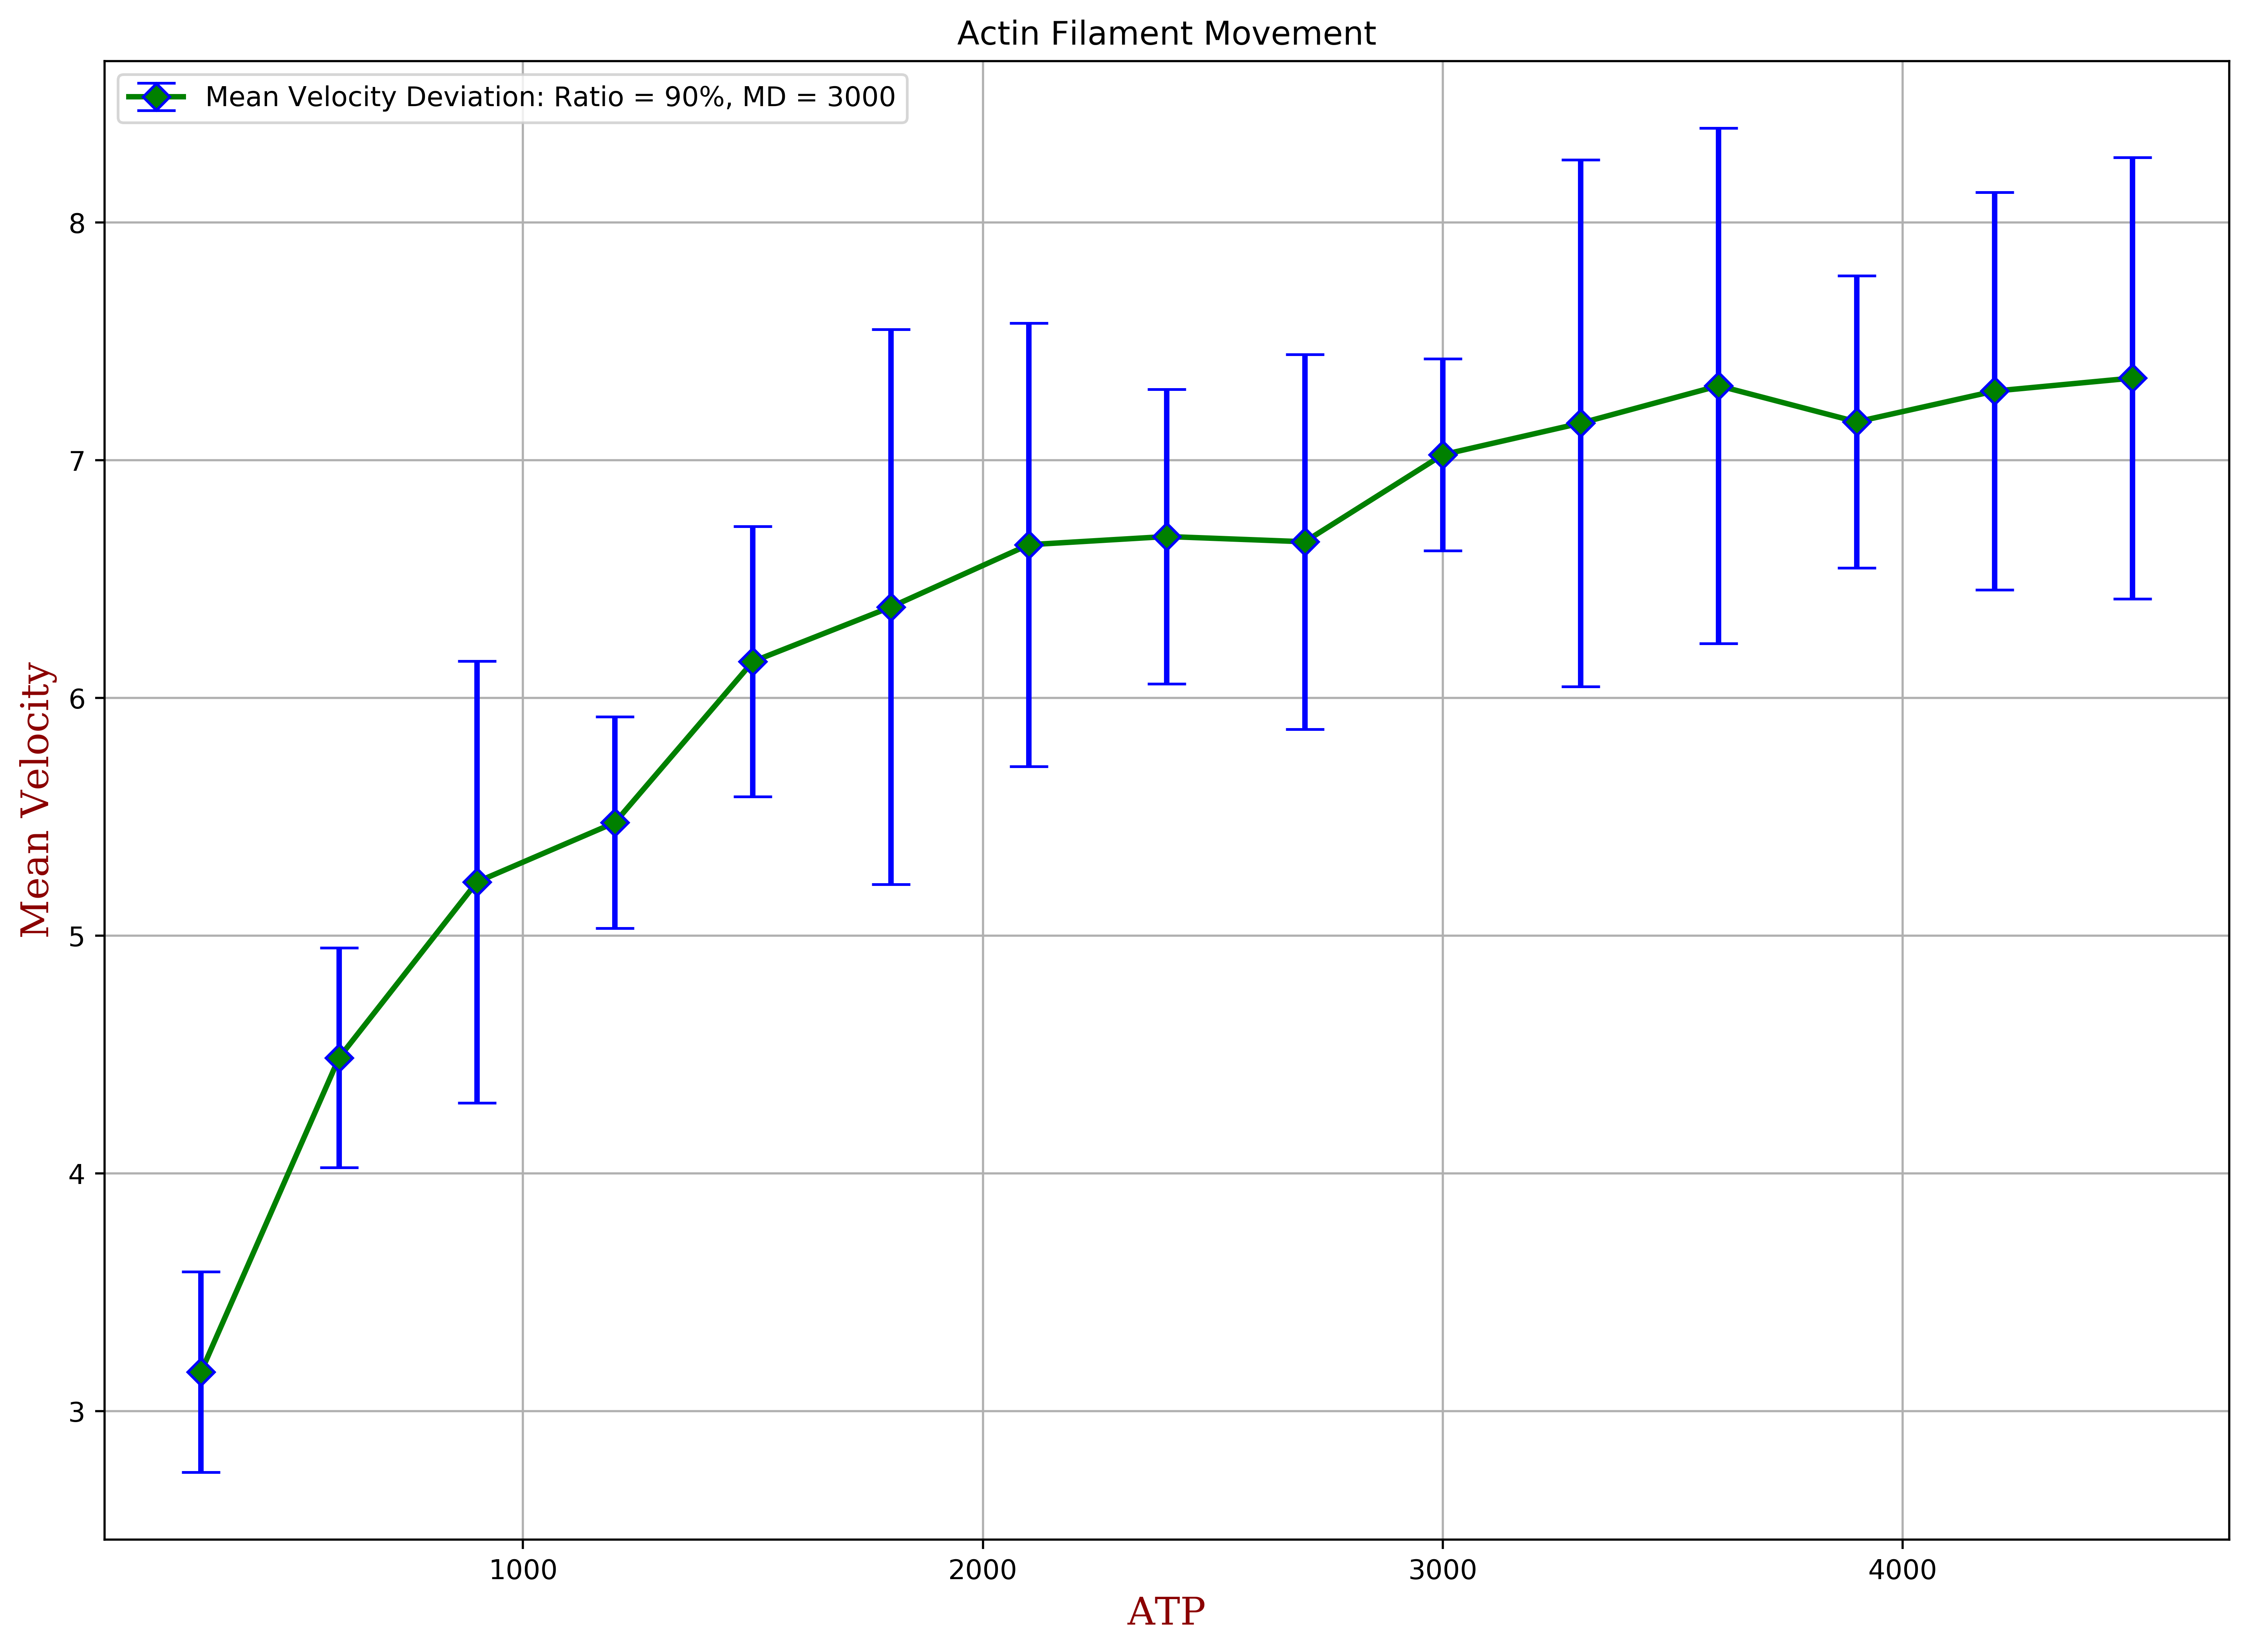

In [11]:
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_fit, 'c--', linewidth=3.5, label= "Curve fit")
plt.errorbar(x,y,yerr=atp_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linestyle='-', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: Ratio = 90%, MD = 3000')
plt.xlabel('ATP', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()

In [12]:
df[25:30]

r   b   atp    md     v_av     v_sd
25  0.9  13  2000  1000  5.93888  2.88525
26  0.9  13  2000  2000  6.73108  1.30774
27  0.9  13  2000  3000  6.56418  1.04057
28  0.9  13  2000  4000  6.39449  0.50562
29  0.9  13  2000  5000  5.77560  1.90921

In [13]:
md_change = df[25:30]

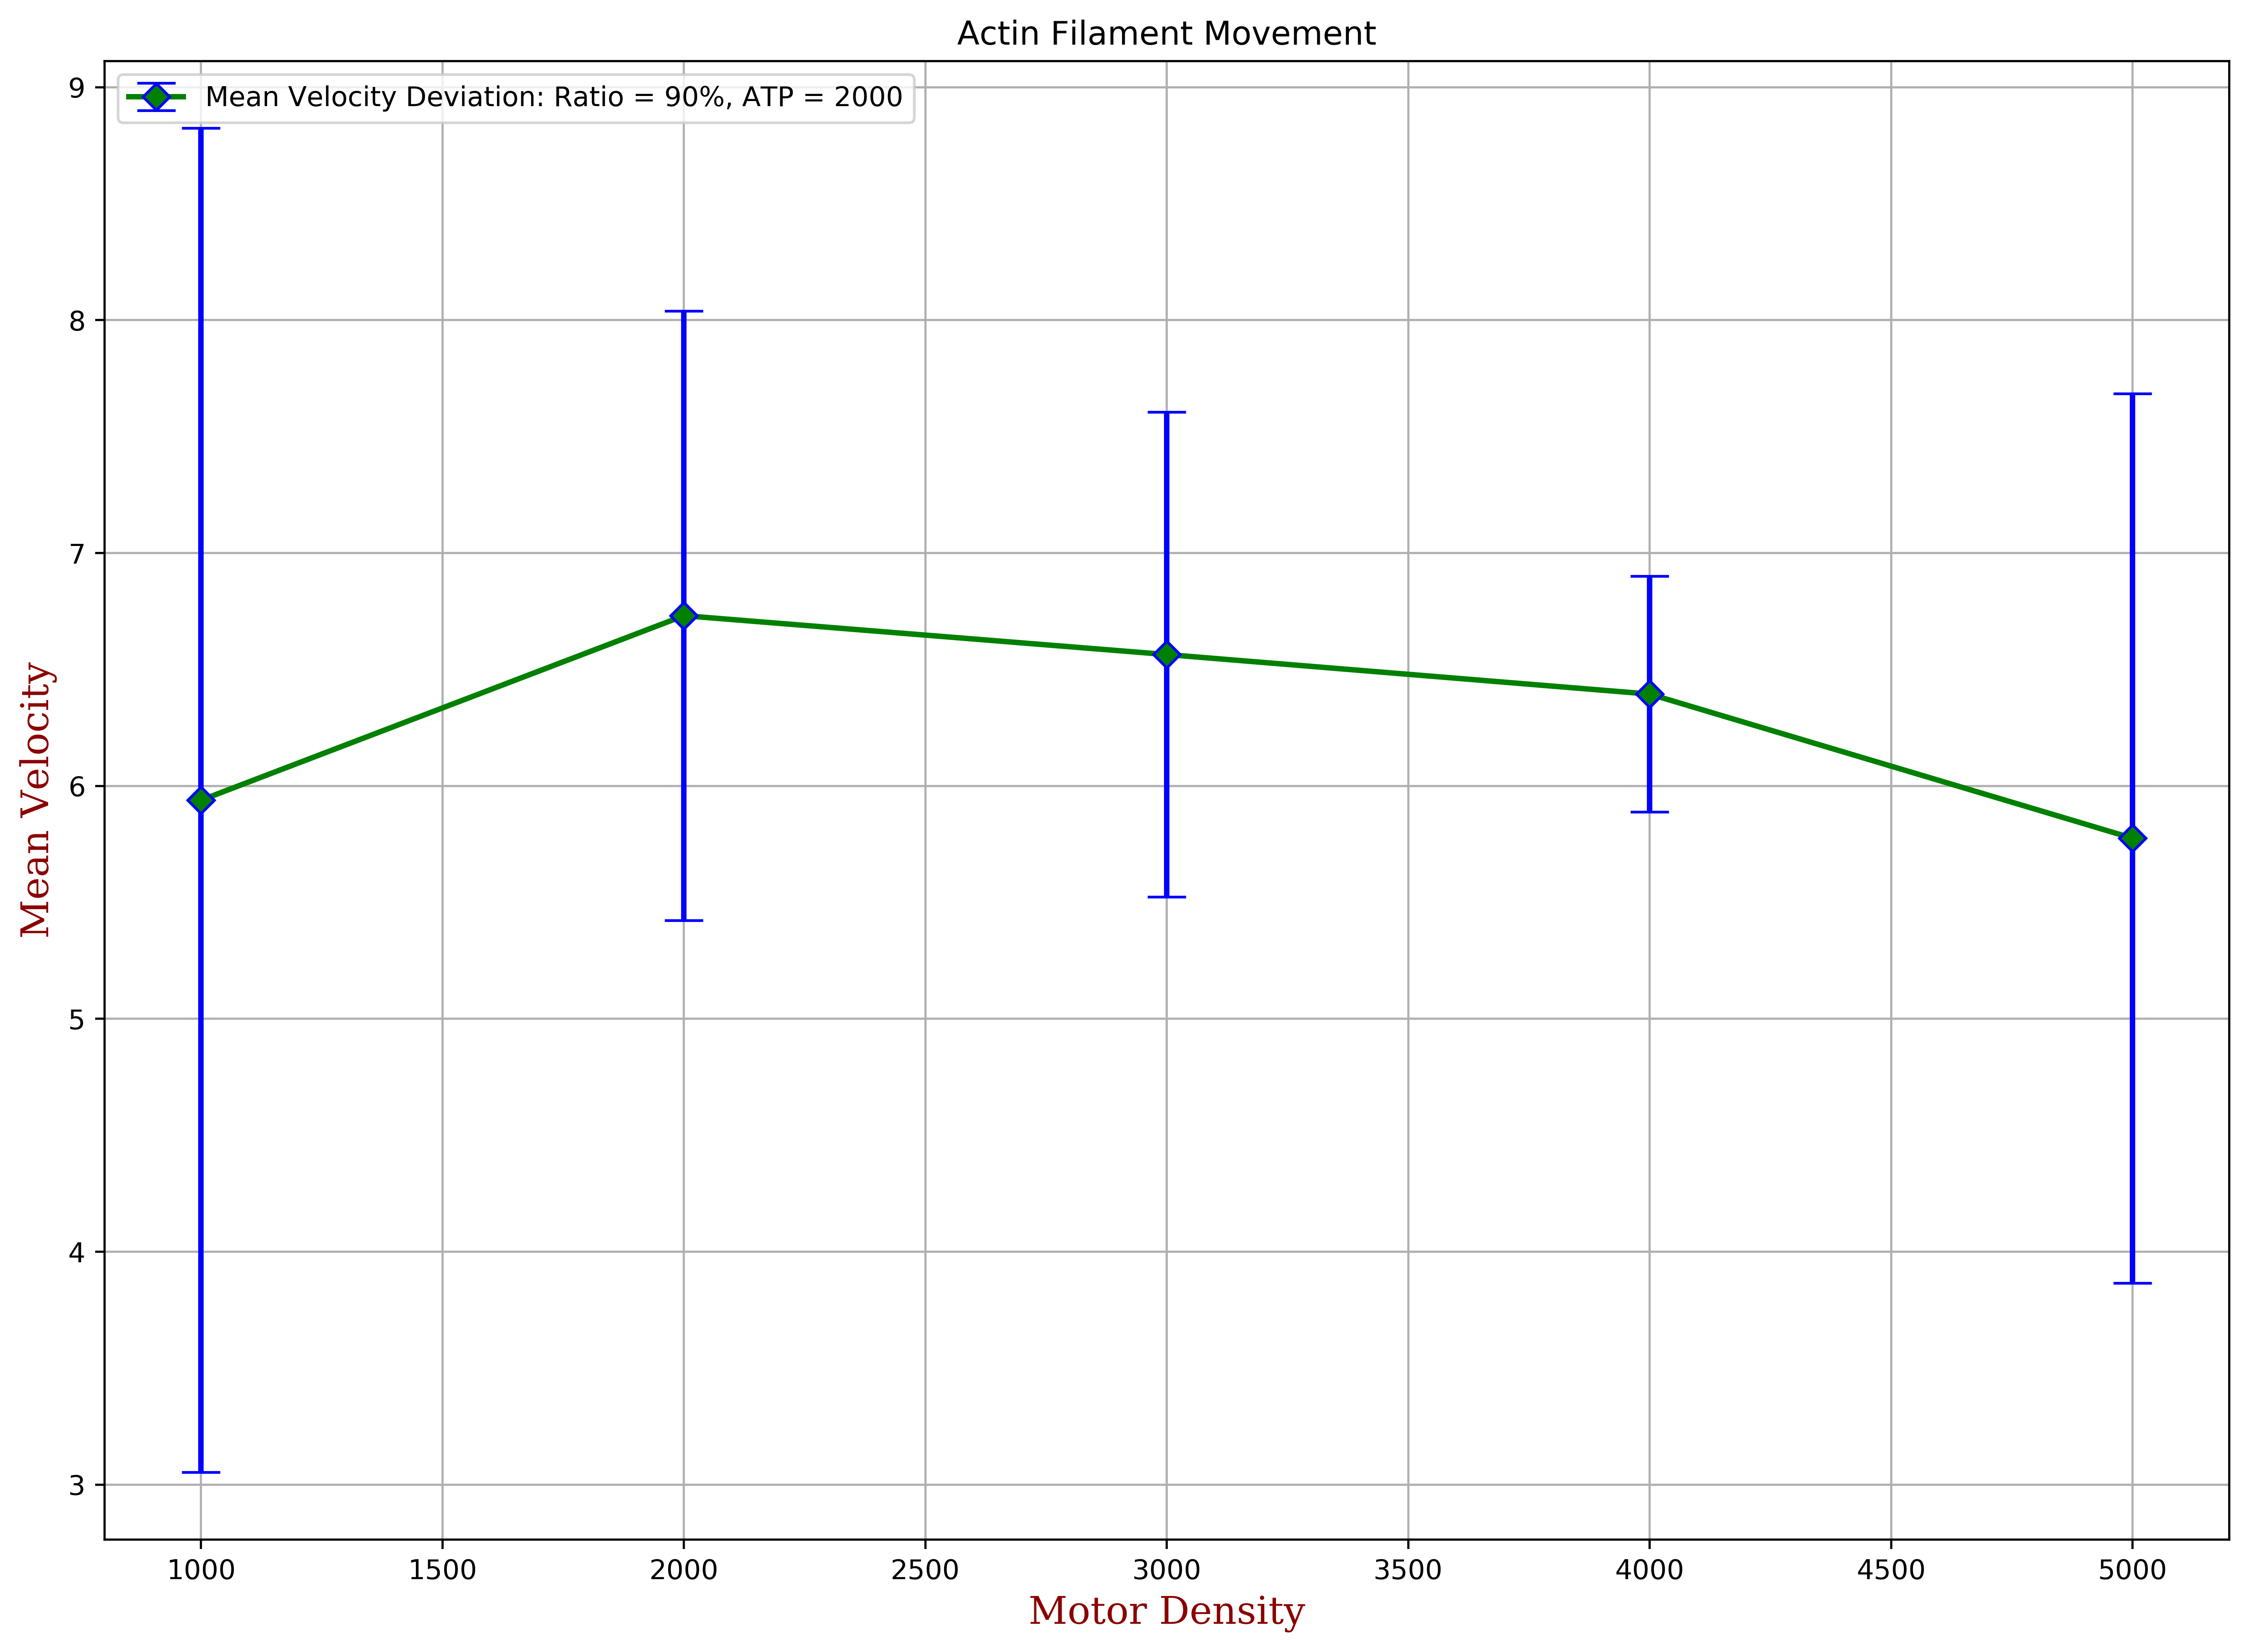

In [14]:
plt.figure(figsize=(14,10), dpi=500)
plt.errorbar(md_change['md'],md_change['v_av'],yerr=md_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linestyle='-', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: Ratio = 90%, ATP = 2000')
plt.xlabel('Motor Density', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()

In [15]:
conf_names = ['beads', 'x', 'y', 'z']
df_conf = pd.read_csv('Conformation_A001.txt', names=conf_names, delim_whitespace=True)
df_conf_good = pd.read_csv('Conformation_A001_good.txt', names=conf_names, delim_whitespace=True)
df_conf = df_conf.drop(['beads', 'x', 'y'], axis=1)
df_conf_good = df_conf_good.drop(['beads', 'x', 'y'], axis=1)
df_conf = df_conf[13:]
df_conf_good = df_conf_good[13:]
df_z = df_conf.iloc[0::13, :]
df_z_good = df_conf_good.iloc[0::13, :]

In [16]:
df_z.shape

(300, 1)

In [17]:
tip_names = ['time', 'x_tip', 'y_tip']
df_tip = pd.read_csv('TipXY_A001.txt', names=tip_names, delim_whitespace=True)
df_tip_good = pd.read_csv('TipXY_A001_good.txt', names=tip_names, delim_whitespace=True)
df_time = df_tip.drop(columns=['x_tip','y_tip'])
df_time_good = df_tip.drop(columns=['x_tip','y_tip'])
df_time = df_time[1:]
df_time_good = df_time[0:]
df_time_good.shape

(300, 1)

In [18]:
Dx_tip = np.diff(df_tip['x_tip']); Dy_tip = np.diff(df_tip['y_tip'])
Dx_tip_good = np.diff(df_tip_good['x_tip']); Dy_tip_good = np.diff(df_tip_good['y_tip'])
dist=np.sqrt((Dx_tip**2)+(Dy_tip**2))
dist_good=np.sqrt((Dx_tip_good**2)+(Dy_tip_good**2))
tym=0.01
vel_tip = dist/tym
vel_tip_good = dist_good/tym
df_vel_tip = pd.DataFrame(data=vel_tip)
df_vel_tip_good = pd.DataFrame(data=vel_tip_good)
df_vel_tip.shape

(300, 1)

<h2>R1.0B3ATP3000MD4000</h2>

<img src="R1.0B13.0ATP3000.0MD4000.0_good.png"
     alt="R1.0B13.0ATP3000.0MD4000.0"
     style="float: left; margin-right: 10px;" />

<h2>R1.0B3ATP3000MD4000</h2>

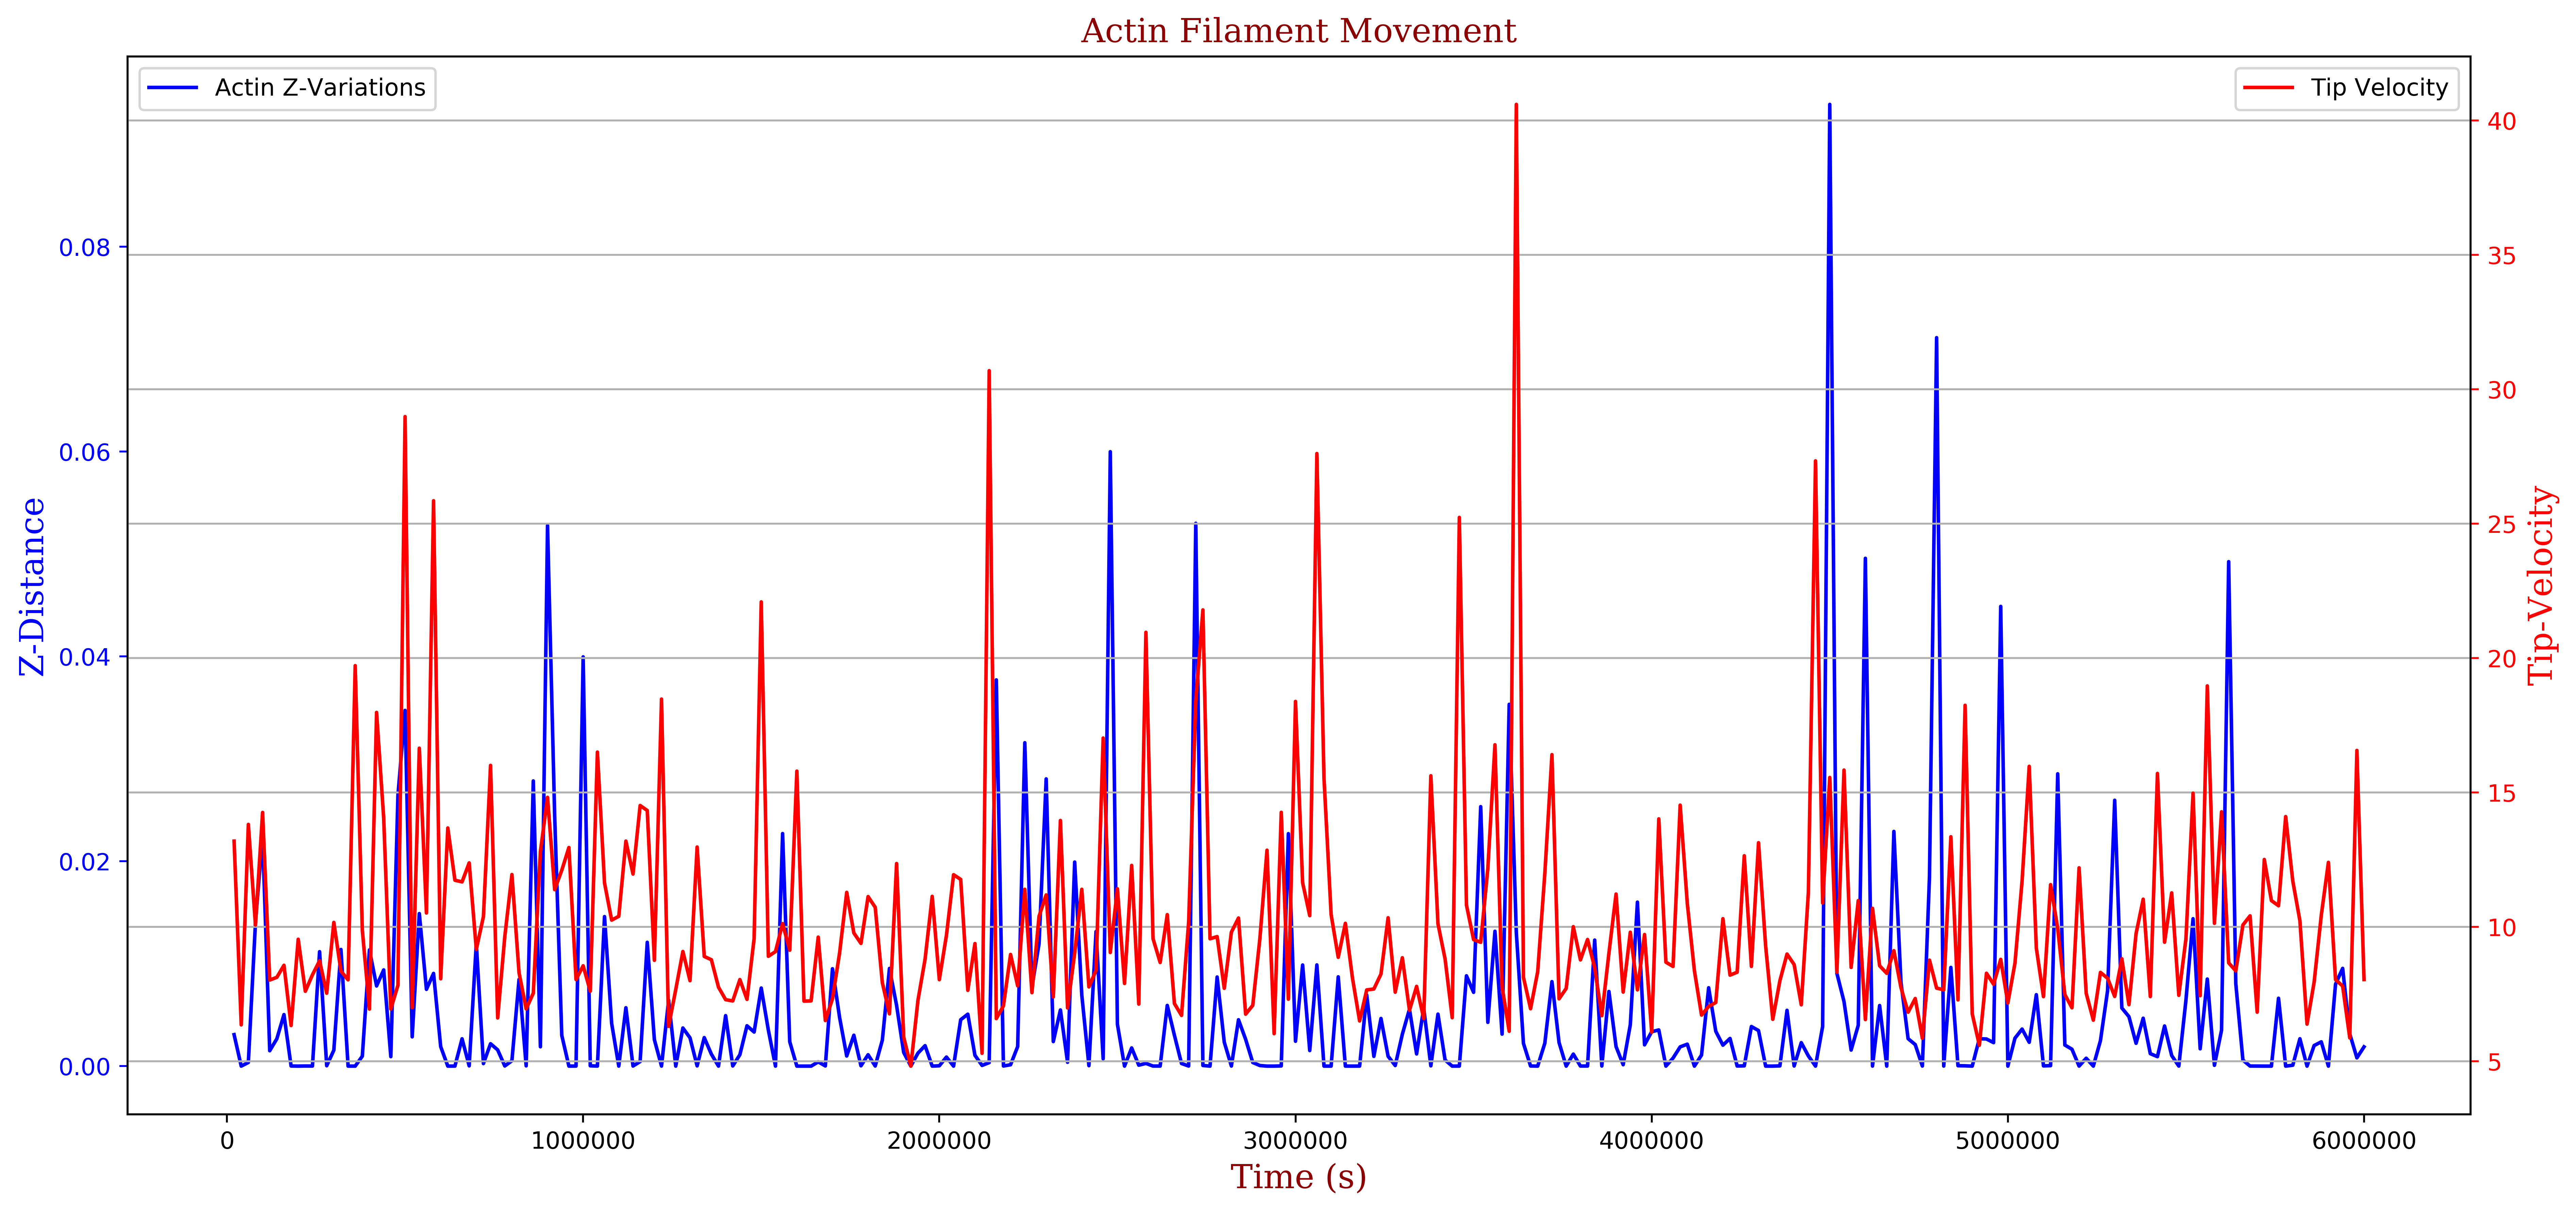

In [19]:
fig, ax1 = plt.subplots(dpi=500)
ax1.plot(df_time_good,df_z_good, 'b', label='Actin Z-Variations')
ax1.set_xlabel('Time (s)',fontdict=font)
ax1.set_ylabel('Z-Distance', color='b',fontdict=font)
ax1.tick_params('y', colors='b')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df_time_good,df_vel_tip_good, 'r', label='Tip Velocity')
fig.set_size_inches([15, 7])
fig.tight_layout()
ax2.set_ylabel('Tip-Velocity', color='r',fontdict=font)
ax2.tick_params('y', colors='r')
plt.title('Actin Filament Movement',fontdict=font); plt.legend(loc='upper right')
plt.grid(); plt.show()

<h2>R1.0B3ATP3000MD4000</h2>

In [20]:
#df_z_good.to_csv('df_z_good', encoding='utf-8', index=False)
#df_vel_tip_good.to_csv('df_vel_tip_good', encoding='utf-8', index=False)

In [21]:
c_names = ['Change in Z', 'Tip Velocity']
z_and_tip_vel_good = pd.read_csv('z_and_tip_vel_good.csv', names=c_names)
z_and_tip_vel_good.corr()

Change in Z  Tip Velocity
Change in Z      1.000000      0.086935
Tip Velocity     0.086935      1.000000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f753048f748>],
      dtype=object)

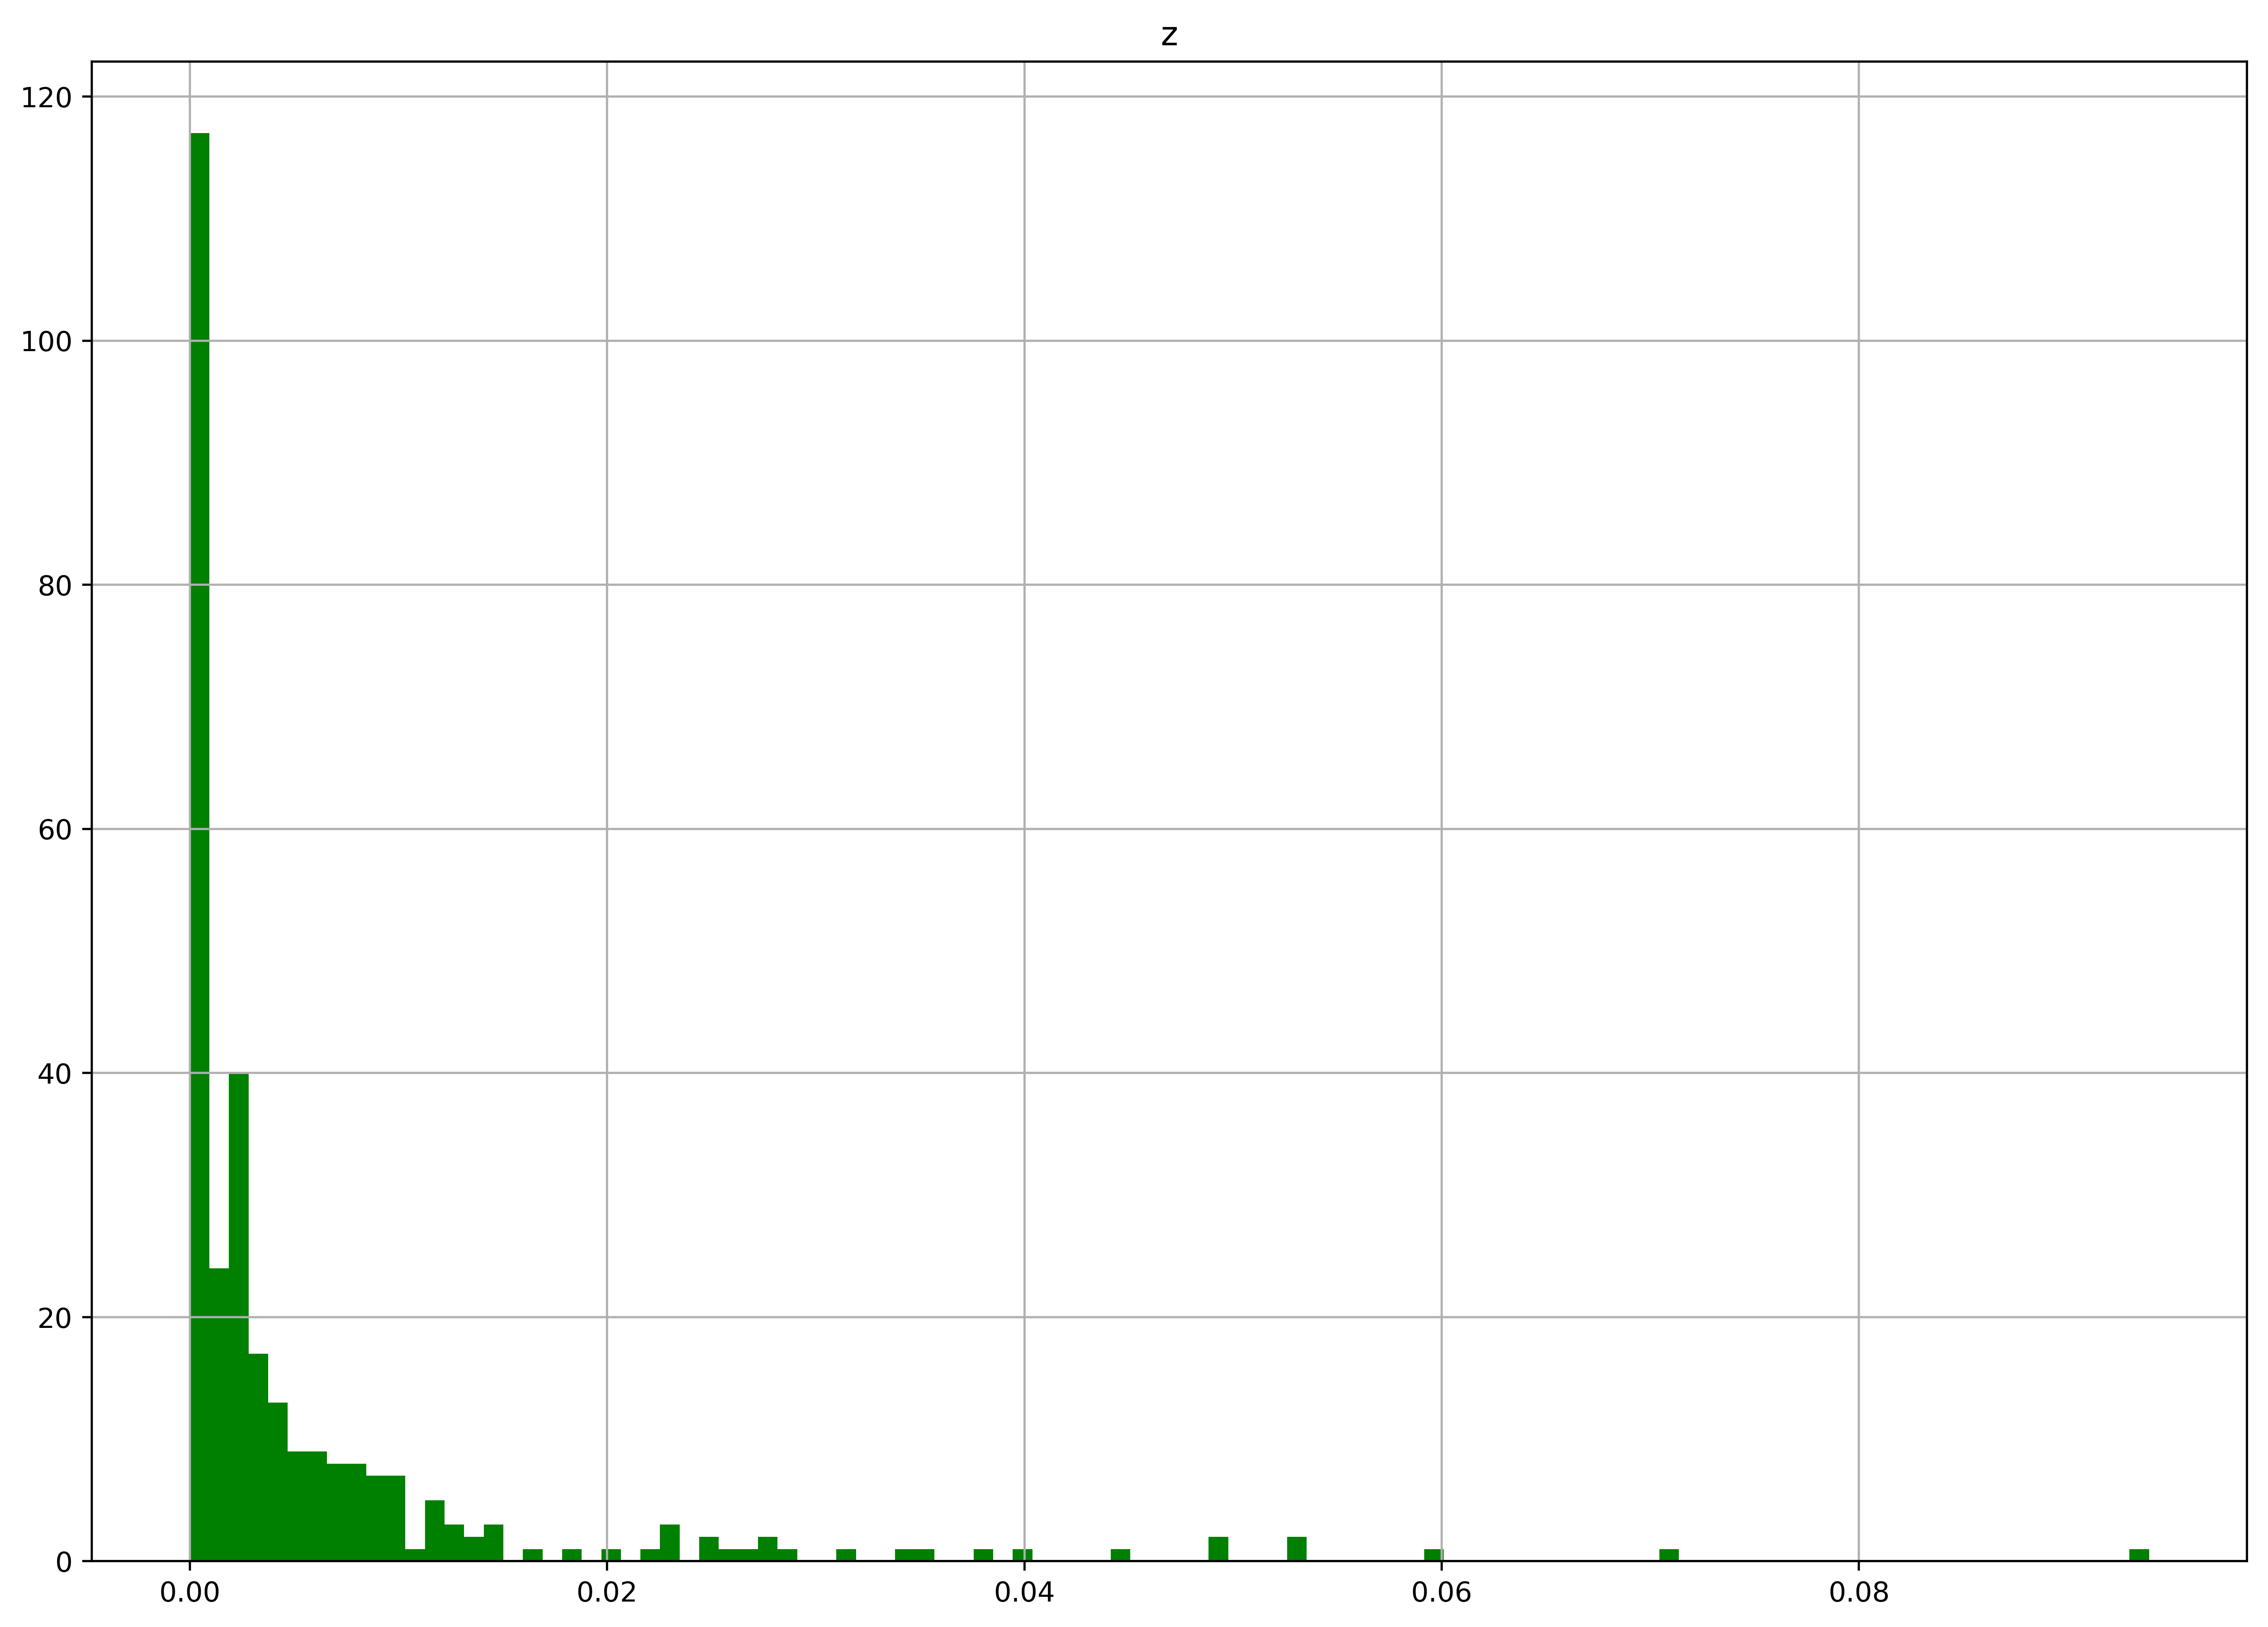

In [22]:
fig = plt.figure(figsize=(14,10), dpi=500)
ax = fig.gca()
df_z_good.hist(bins=100, ax=ax, color='green')

<h2>R1.0B3ATP3000MD4000</h2>

<img src="R0.9LAF3ATP3300MD3000.png"
     alt="R0.9LAF3ATP3300MD3000"
     style="float: left; margin-right: 10px;" />

<h2>R0.9LAF3ATP3300MD3000</h2>

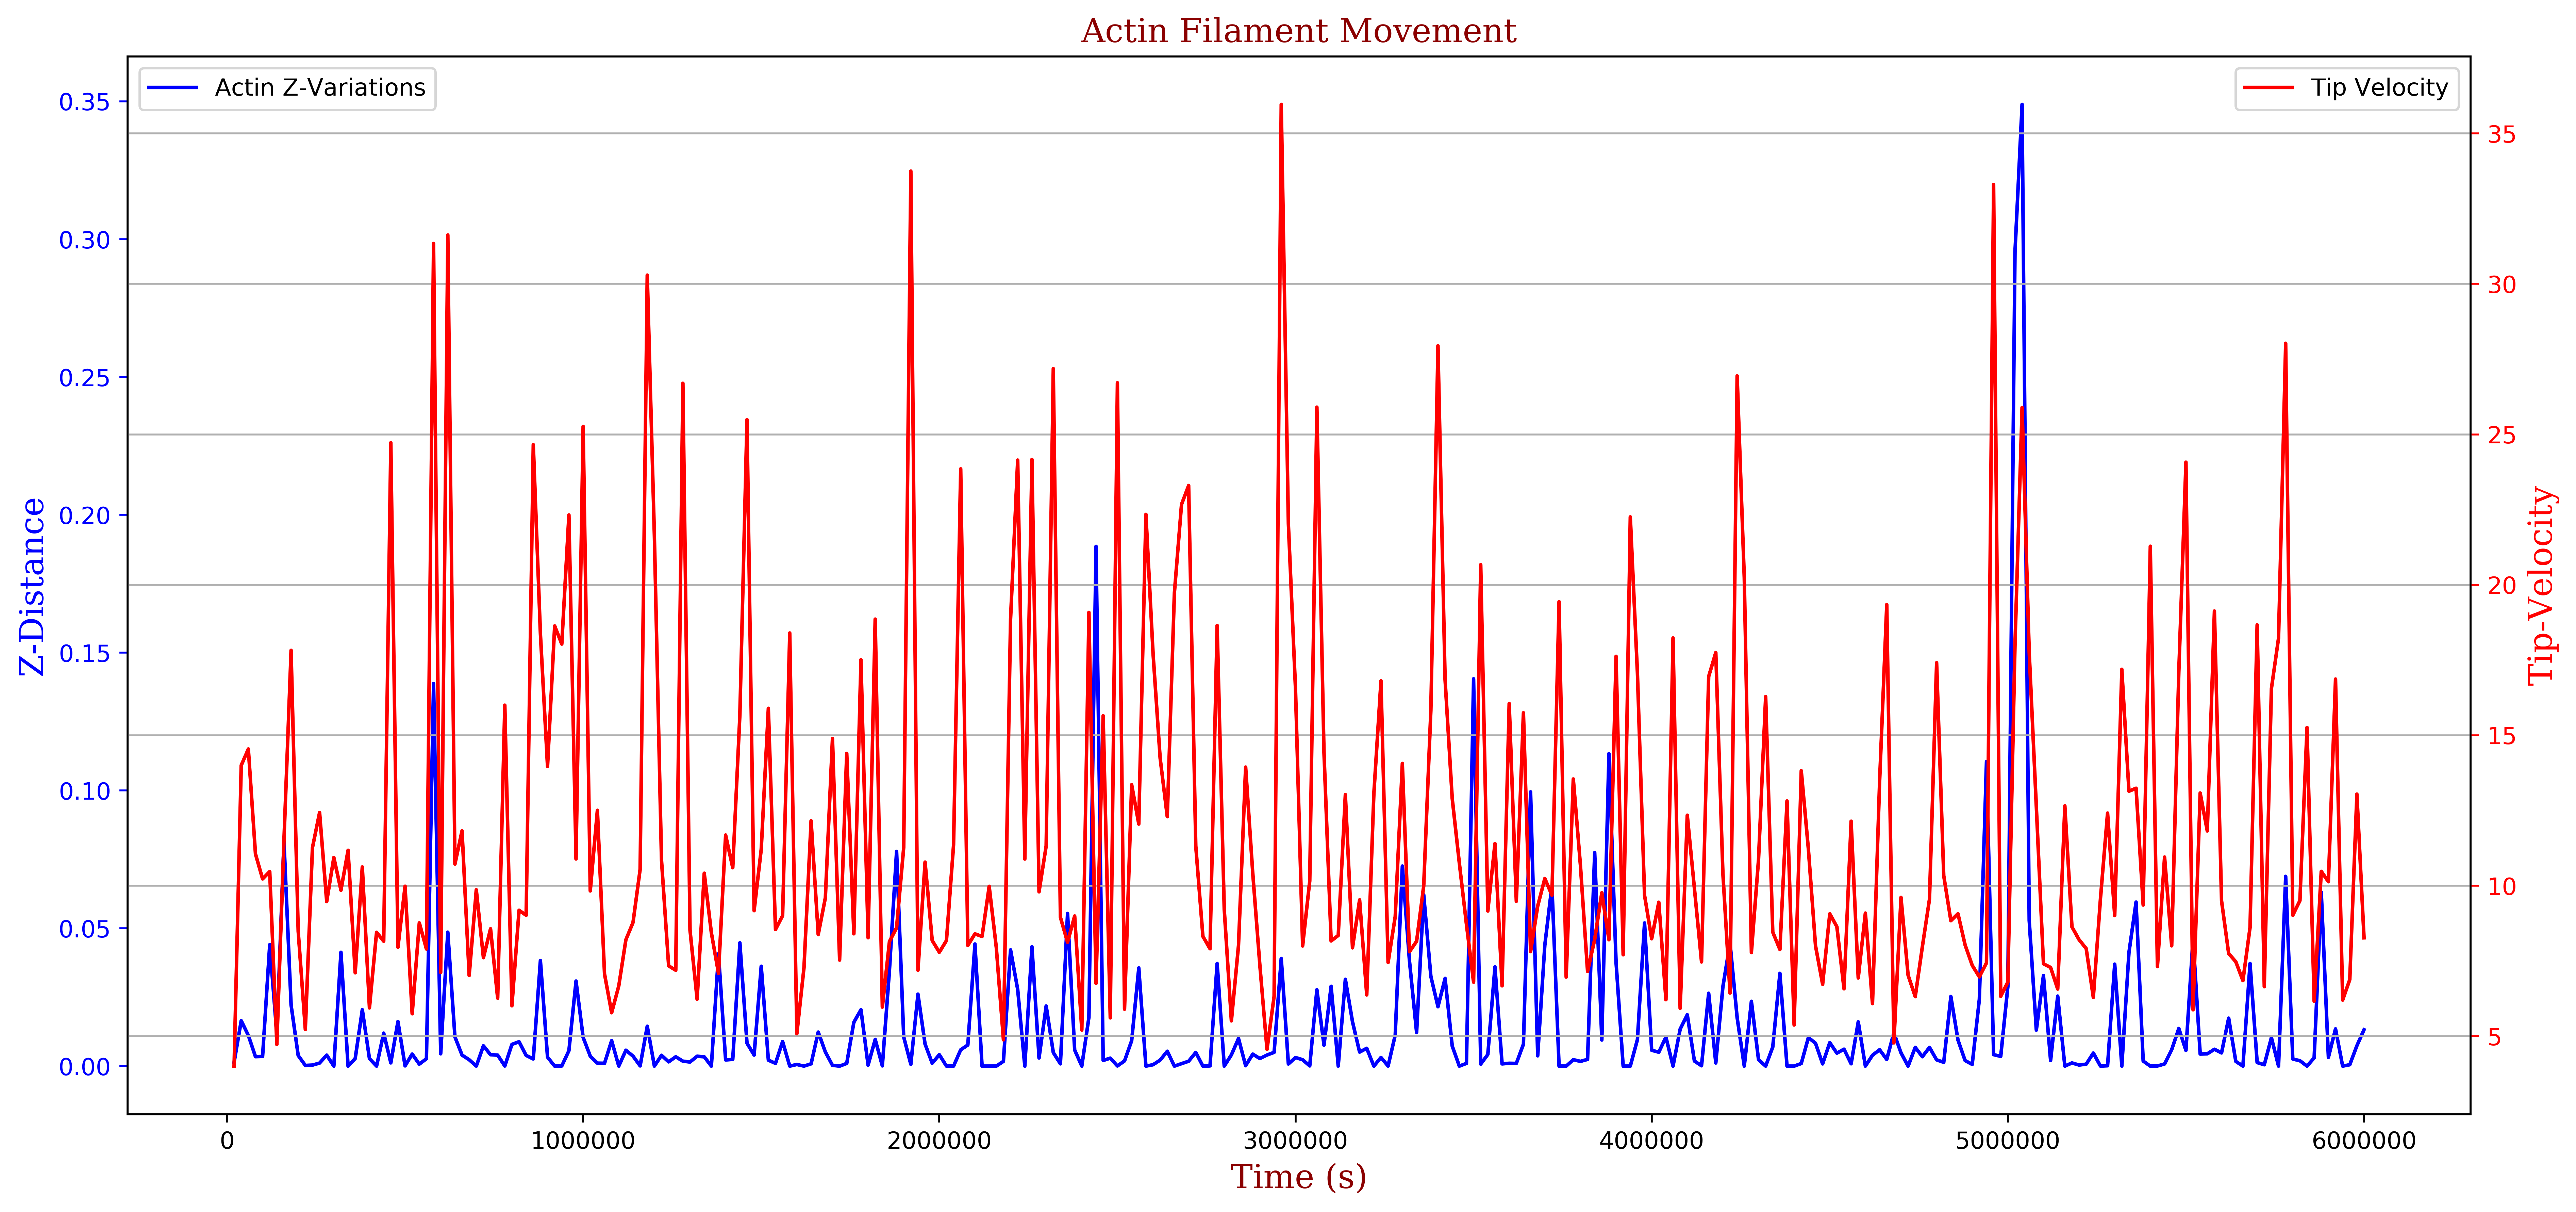

In [23]:
fig, ax1 = plt.subplots(dpi=500)
ax1.plot(df_time,df_z, 'b', label='Actin Z-Variations')
ax1.set_xlabel('Time (s)',fontdict=font)
ax1.set_ylabel('Z-Distance', color='b',fontdict=font)
ax1.tick_params('y', colors='b')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df_time,df_vel_tip, 'r', label='Tip Velocity')
fig.set_size_inches([15, 7])
fig.tight_layout()
ax2.set_ylabel('Tip-Velocity', color='r',fontdict=font)
ax2.tick_params('y', colors='r')
plt.title('Actin Filament Movement',fontdict=font); plt.legend(loc='upper right')
plt.grid(); plt.show()

<h2>R0.9LAF3ATP3300MD3000</h2>

In [24]:
#df_z.columns = ['Change in Z']
#df_vel_tip.columns = ['Tip Velocity']
#df_z = df_z.reset_index(drop=True)
#df_z.merge(df_vel_tip, how='left', left_on='Change in Z', right_on='Tip Velocity')
#np.array(df_z, df_vel_tip)

#df_z.to_csv('df_z', encoding='utf-8', index=False)
#df_vel_tip.to_csv('df_vel_tip', encoding='utf-8', index=False)

In [25]:
c_names = ['Change in Z', 'Tip Velocity']
z_and_tip_vel = pd.read_csv('z_and_tip_vel.csv', names=c_names)
z_and_tip_vel.corr()

Change in Z  Tip Velocity
Change in Z       1.00000       0.13868
Tip Velocity      0.13868       1.00000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75303ab828>],
      dtype=object)

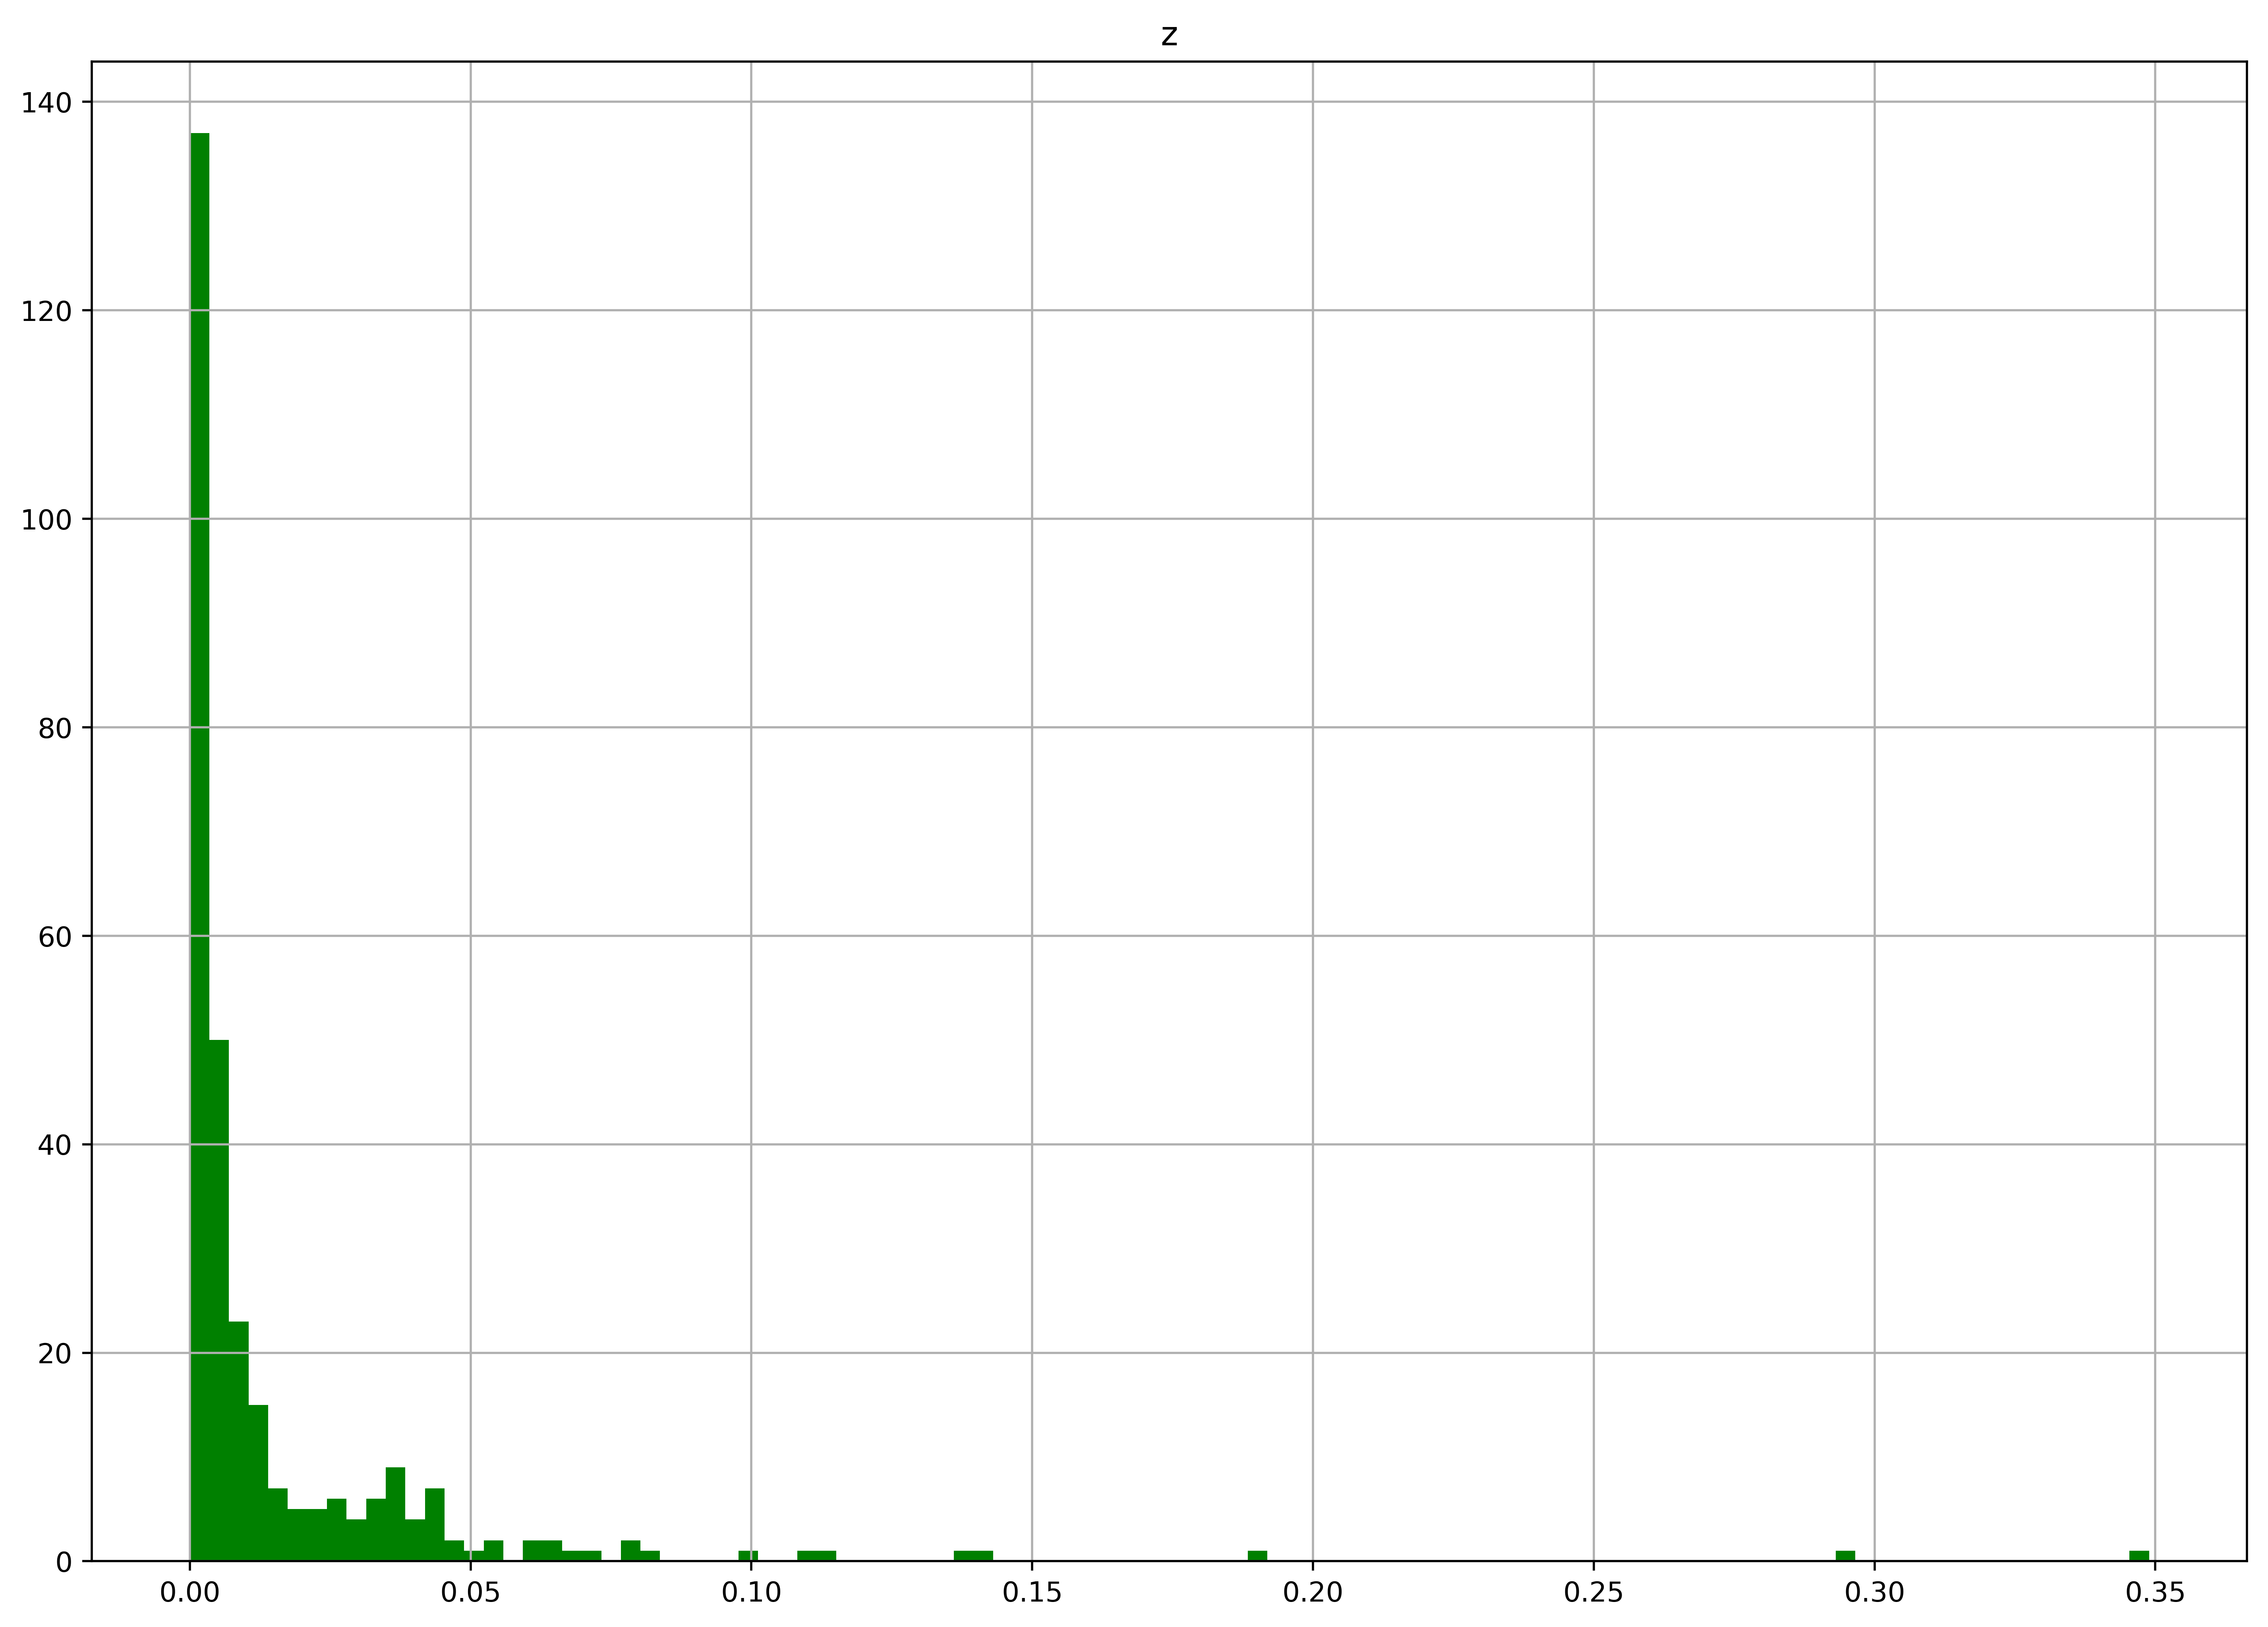

In [26]:
fig = plt.figure(figsize=(14,10), dpi=500)
ax = fig.gca()
df_z.hist(bins=100, ax=ax, color='green')

<h2>R0.9LAF3ATP3300MD3000</h2>